In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'..')

from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
#import json
import orjson as json
import re

from ue4nlp.ue_scores import *
from ue4nlp.ue_variation_ratio import ue_variation_ratio

from utils.plot_error_detection import draw_charts
from utils.plot_error_detection import create_chart_data

import matplotlib.pyplot as plt
from utils.plot_error_detection import plot_error_detection, plot_rejection_curve_aucs


def plot_roc_auc(res_path):
    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
    
    
    plot_error_detection(np.asarray(model_outputs['probabilities']), 
                         np.asarray(model_outputs['true_labels']), 
                         np.asarray(model_outputs['sampled_probabilities']).transpose(1, 0, 2))
    
def plot_rejection_curves(res_path):
    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
    
    plot_rejection_curve_aucs(np.asarray(model_outputs['probabilities']), 
                              np.asarray(model_outputs['true_labels']), 
                              np.asarray(model_outputs['sampled_probabilities']).transpose(1, 0, 2),
                              np.asarray(model_outputs['answers']), )

## SST2 all dropconnect

bald: 0.8774617710076018
var_ratio: 0.6928766399577352
entropy: 0.8805729212526782
sampled_max_prob: 0.8805729212526782
variance: 0.8784596871239472
max_prob: 0.8793989022922721


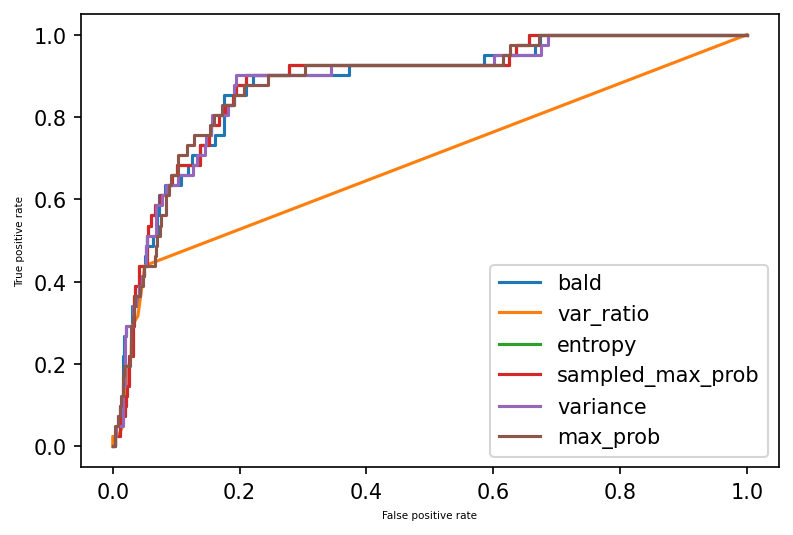

In [13]:
res_dir = '../workdir/results/mc_masks/sst2/MC/all/20/0.1/103/51/'
plot_roc_auc(res_dir)

## SST2 last dropconnect

bald: 0.8572520360153806
var_ratio: 0.5098039215686274
entropy: 0.8465763893864489
sampled_max_prob: 0.8465525065080843
variance: 0.8513290821809845
max_prob: 0.8462420290893459


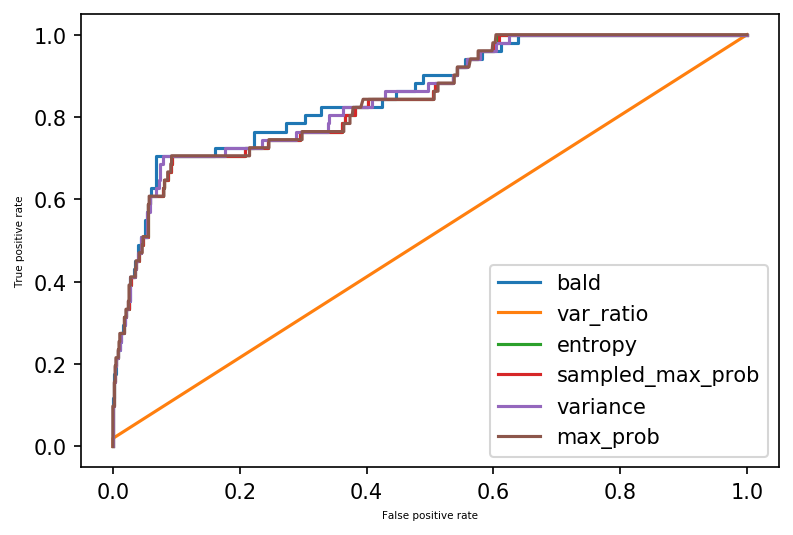

In [62]:
res_dir = '../workdir/results/deep_ensemble/sst-2/DC_MC_last/0.63/2021-01-26/rep4/'
plot_roc_auc(res_dir)

## CoLA all dropconnect

bald: 0.649218884225511
var_ratio: 0.5218319711361461
entropy: 0.7931393122745012
sampled_max_prob: 0.7931393122745012
variance: 0.7696751589230052
max_prob: 0.800603784699212


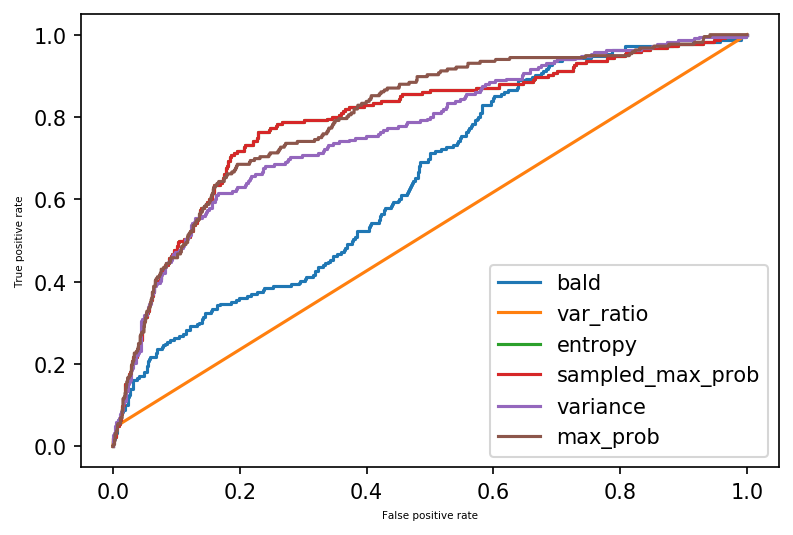

In [185]:
#dpp without calibration and reused
res_dir = '../workdir/results/cola/DPP_last/0.01/2021-03-23/08-11-00-0'
res_dir = '../workdir/results/mrpc/DPP_last/0.0/2021-03-23/13-45-07-0'
plot_roc_auc(res_dir)

bald: 0.5892710397834388
var_ratio: 0.520209954721967
entropy: 0.7721475644929988
sampled_max_prob: 0.7721475644929988
variance: 0.7287950564766923
max_prob: 0.8161607128470376


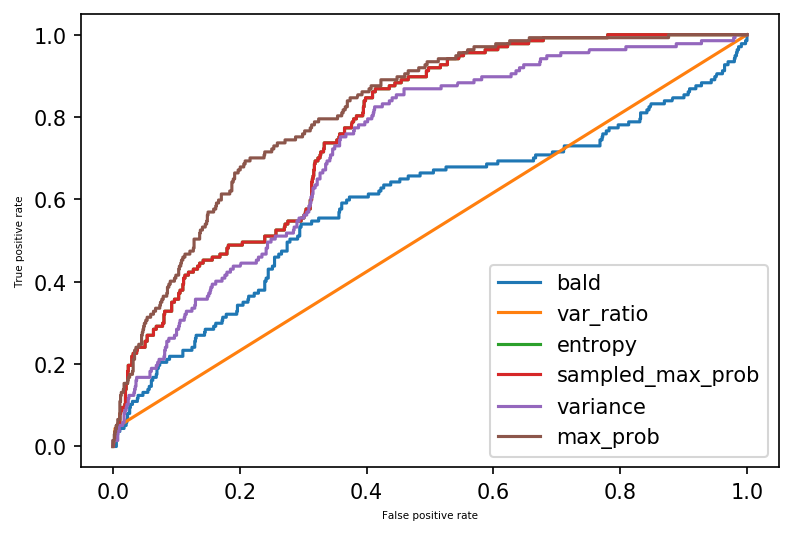

In [166]:
#dpp with reused, without calibration
res_dir = '../workdir/results/dpp_masks_not_calibrated/cola/DPP_last/1/777/rep2/'
plot_roc_auc(res_dir)

bald: 0.2775179081692567
var_ratio: 0.5202633055414205
entropy: 0.725411333359429
sampled_max_prob: 0.725411333359429
variance: 0.2773482861653684
max_prob: 0.7498173301496588


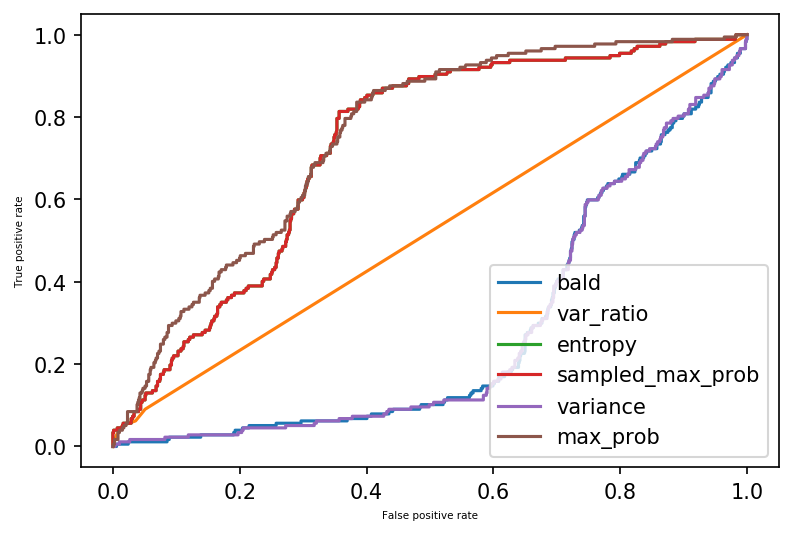

In [213]:
#reused, calibration
res_dir = '../workdir/results/cola/DPP_last/0.2/2021-03-26/14-31-15-0'
plot_roc_auc(res_dir)

bald: 0.4388551959407655
var_ratio: 0.5
entropy: 0.7233418905764079
sampled_max_prob: 0.7233418905764079
variance: 0.48035208173602917
max_prob: 0.766445413116703


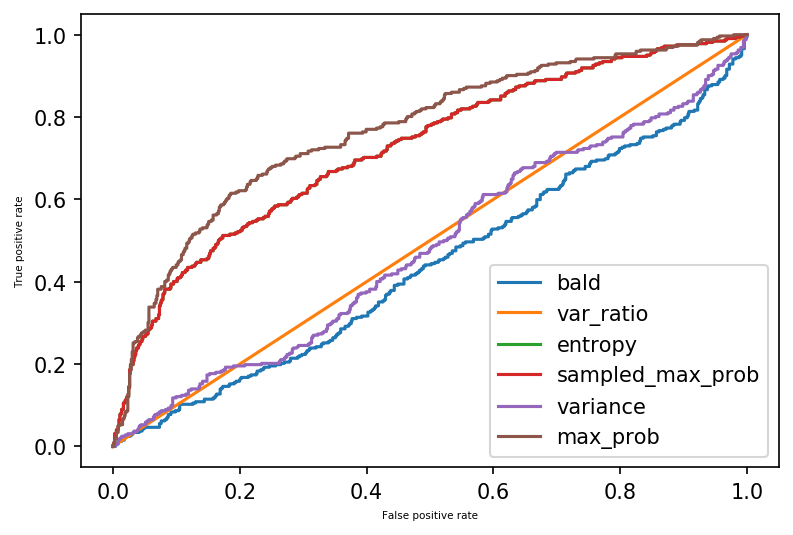

In [209]:
#reused, calibration
res_dir = '../workdir/results/cola/DPP_last/0.01/2021-03-23/14-50-51-0'
plot_roc_auc(res_dir)

bald: 0.5
var_ratio: 0.5
entropy: 0.783446306224709
sampled_max_prob: 0.783446306224709
variance: 0.5
max_prob: 0.7971637473887192


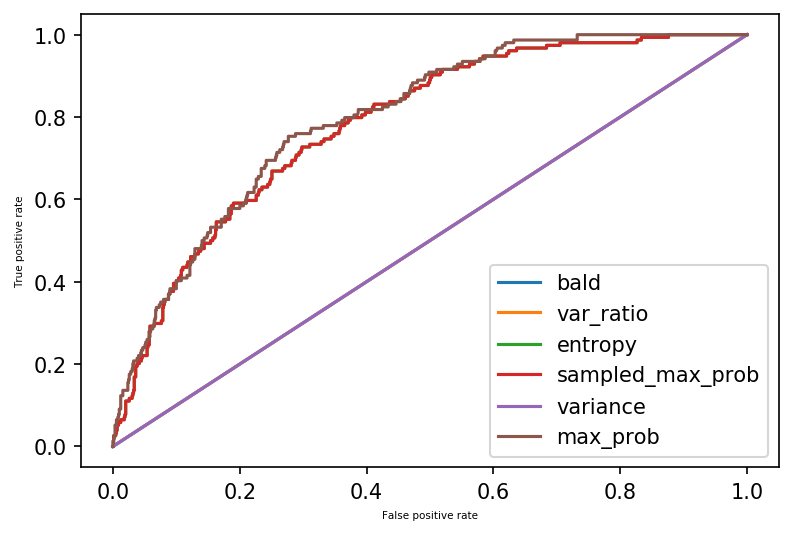

In [205]:
#1 mask not calibrated
res_dir = '../workdir/results/cola/DPP_last/0.0/2021-03-23/14-27-36-0'
plot_roc_auc(res_dir)

bald: 0.7537634002717801
var_ratio: 0.5045221198852484
entropy: 0.7838857013438019
sampled_max_prob: 0.7838857013438019
variance: 0.7739657255020383
max_prob: 0.7986750717197644


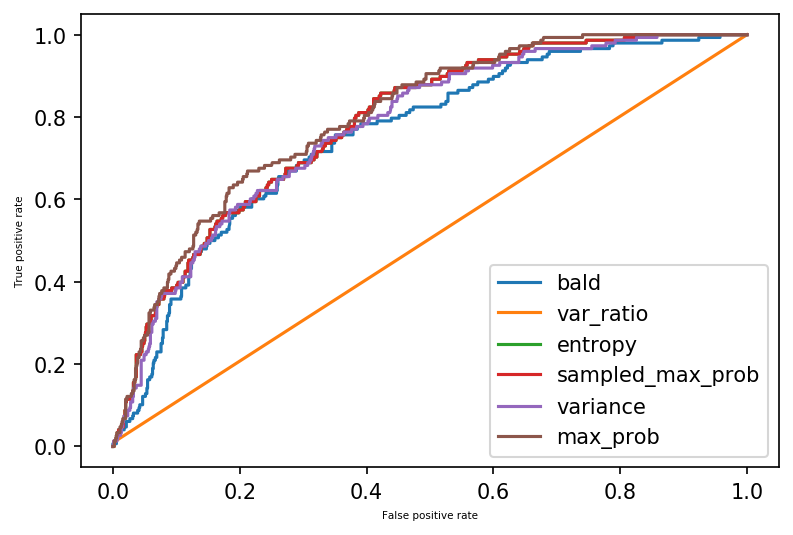

In [181]:
#reused, calibration
res_dir = '../workdir/results/cola/DPP_last/0.0/2021-03-23/11-46-40-0'
res_dir = '../workdir/results/cola/DPP_last/0.0/2021-03-23/13-13-38-0'
plot_roc_auc(res_dir)

bald: 0.7641183559647426
var_ratio: 0.718221437479856
entropy: 0.7821394038760667
sampled_max_prob: 0.7821394038760667
variance: 0.7686586510839254
max_prob: 0.7278135115819566


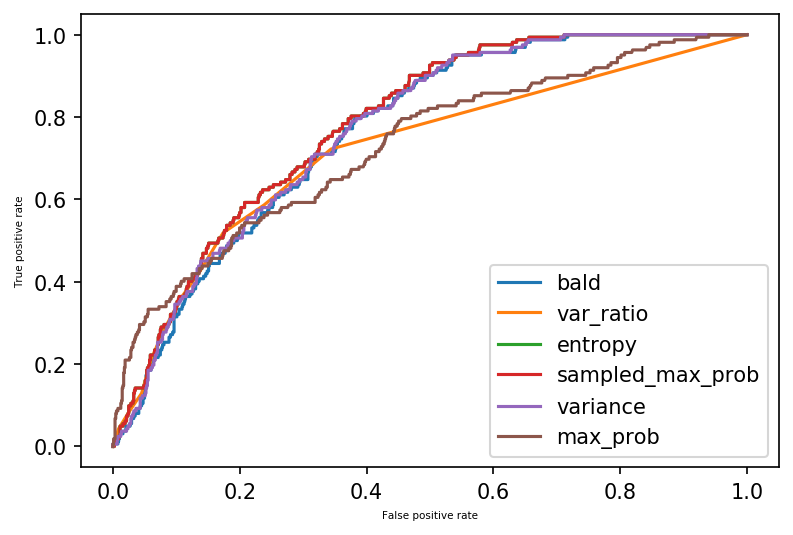

In [74]:
res_dir = '../workdir/results/deep_ensemble/cola/DC_MC_all/0.63/2021-01-26/rep4/'
plot_roc_auc(res_dir)

## CoLA last dropconnect

bald: 0.7820398283471541
var_ratio: 0.5023136482338388
entropy: 0.7629350498617921
sampled_max_prob: 0.76292741405904
variance: 0.7722583650219147
max_prob: 0.7598692750568867


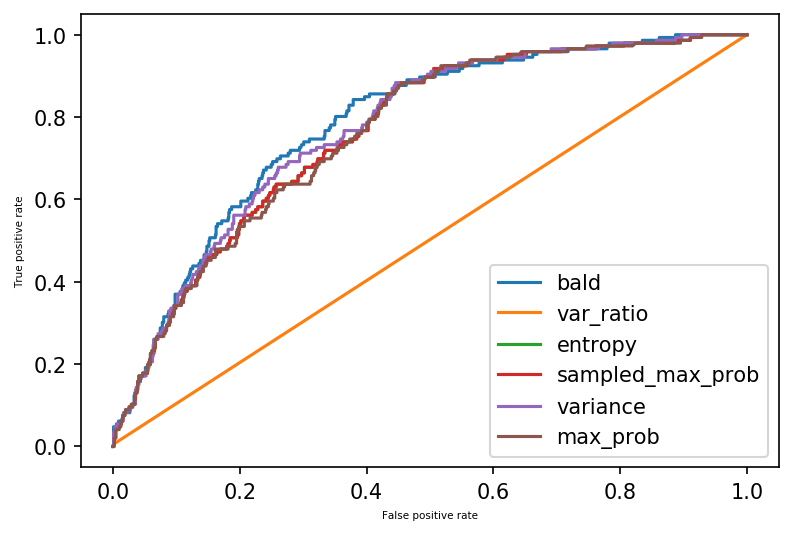

In [79]:
res_dir = '../workdir/results/deep_ensemble/cola/DC_MC_last/0.63/2021-01-26/rep4/'
plot_roc_auc(res_dir)

## MRPC last dropconnect

bald: 0.7502486549367456
var_ratio: 0.5095361349425622
entropy: 0.7412185546022975
sampled_max_prob: 0.7412112839901119
variance: 0.7439493965391886
max_prob: 0.7481968881779846


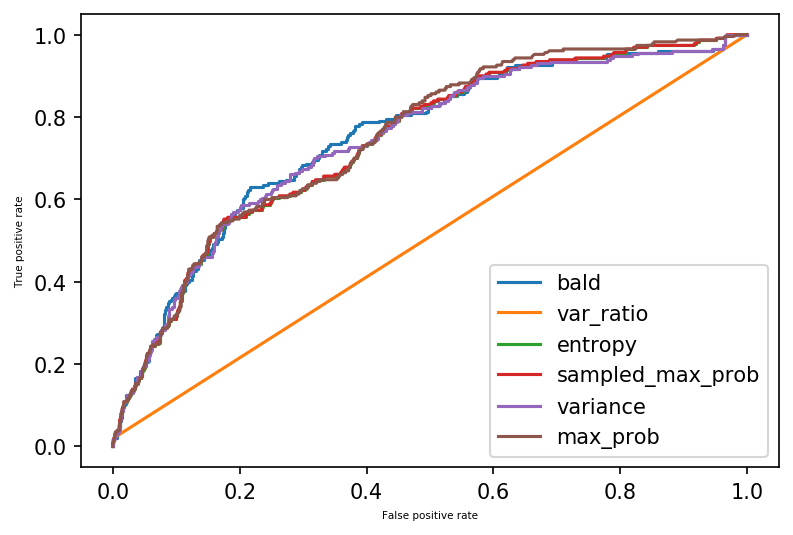

In [87]:
res_dir = '../workdir/results/deep_ensemble/mrpc/DC_MC_last/0.63/2021-01-26/rep7/'
plot_roc_auc(res_dir)

## COLA correct calibration DPP

bald: 0.8232565504881968
var_ratio: 0.5287588060808306
entropy: 0.8206379001359535
sampled_max_prob: 0.8206379001359535
variance: 0.8236891298974169
max_prob: 0.7941578605858362


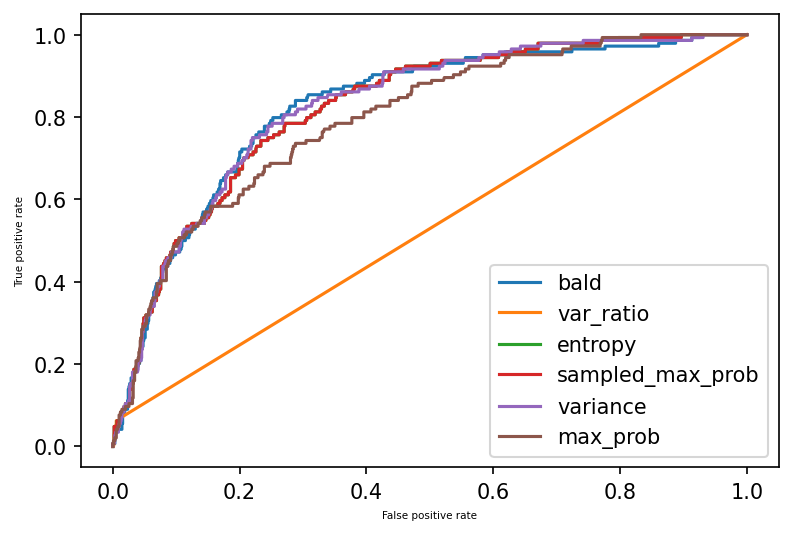

In [4]:
res_dir = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/dpp_calibrated/cola/DPP/0.4/True/True/0.0/101/17'
plot_roc_auc(res_dir)

## MRPC correct calibration DPP

bald: 0.7894092439546985
var_ratio: 0.5456075910621365
entropy: 0.8025099479644935
sampled_max_prob: 0.8025099479644935
variance: 0.8088766452402816
max_prob: 0.7972451790633609


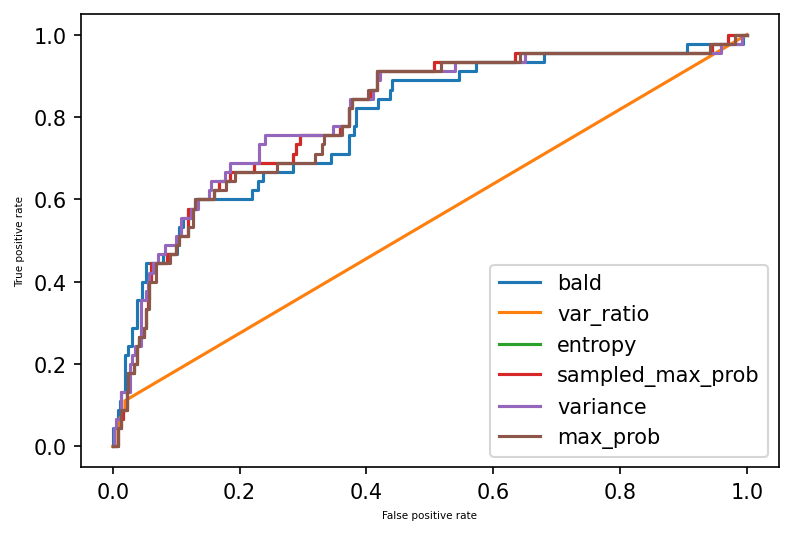

In [8]:
res_dir = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_glue_for_model_series/electra-reg/mrpc/0.1/dpp/False/0.3/2021-09-28/20-53-23/results/102'
plot_roc_auc(res_dir)

bald: 0.9310049019607843
var_ratio: 0.8987745098039216
entropy: 0.930514705882353
sampled_max_prob: 0.930514705882353
variance: 0.9314950980392157
max_prob: 0.9305759803921568


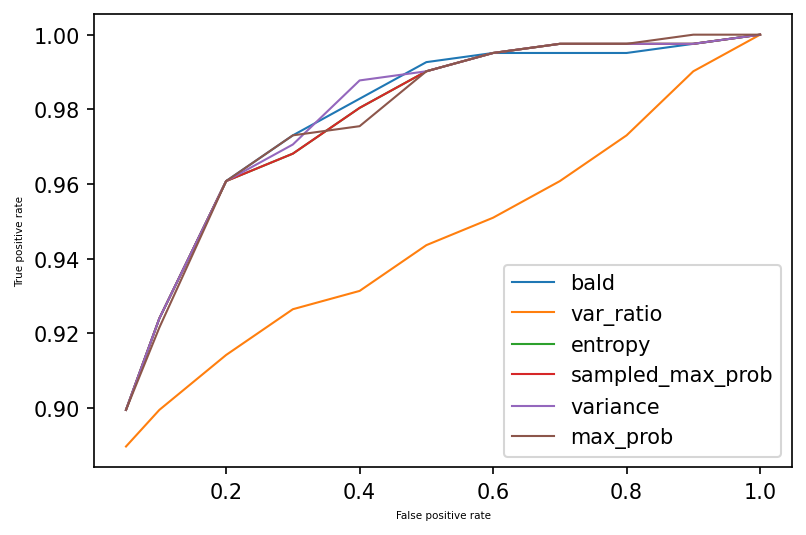

In [55]:
plot_rejection_curves(res_dir)

## SST2 correct calibration DPP

bald: 0.8134759313694832
var_ratio: 0.4993849938499385
entropy: 0.8080972335147081
sampled_max_prob: 0.8080972335147081
variance: 0.8075968895282173
max_prob: 0.8038130381303813


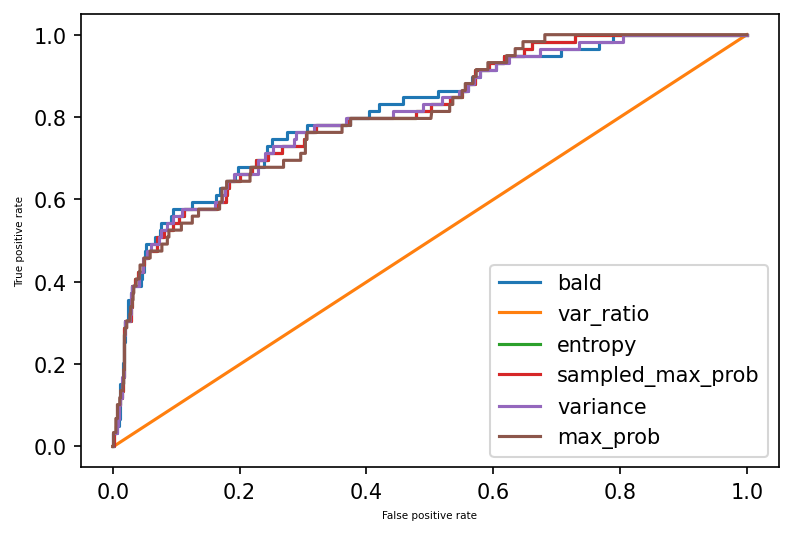

In [25]:
res_dir = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/sst2/mc-dpp_last/0.1/2021-09-15/12-16-45-0'
plot_roc_auc(res_dir)

# OOD DPP on MRPC

(20, 872, 2)
bald: 0.8134759313694832
var_ratio: 0.4993849938499385
entropy: 0.8080972335147081
sampled_max_prob: 0.8080972335147081
variance: 0.8075968895282173
max_prob: 0.8038130381303813


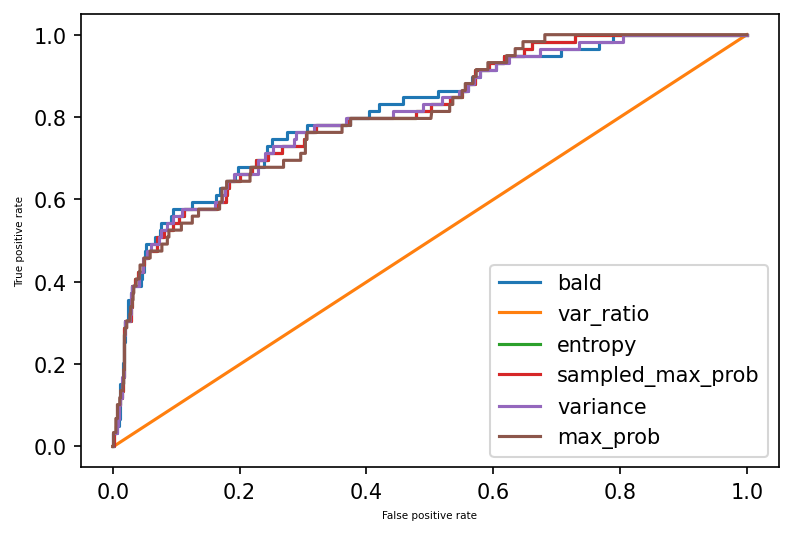

In [5]:
res_dir = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/sst2/mc-dpp_last/0.1/2021-09-15/12-03-14-0'
plot_roc_auc(res_dir)

# OOD DPP on Cola

bald: 0.804262799573634
var_ratio: 0.528182271430045
entropy: 0.7957784616442596
sampled_max_prob: 0.7957784616442596
variance: 0.8030163669497644
max_prob: 0.7931867413953169


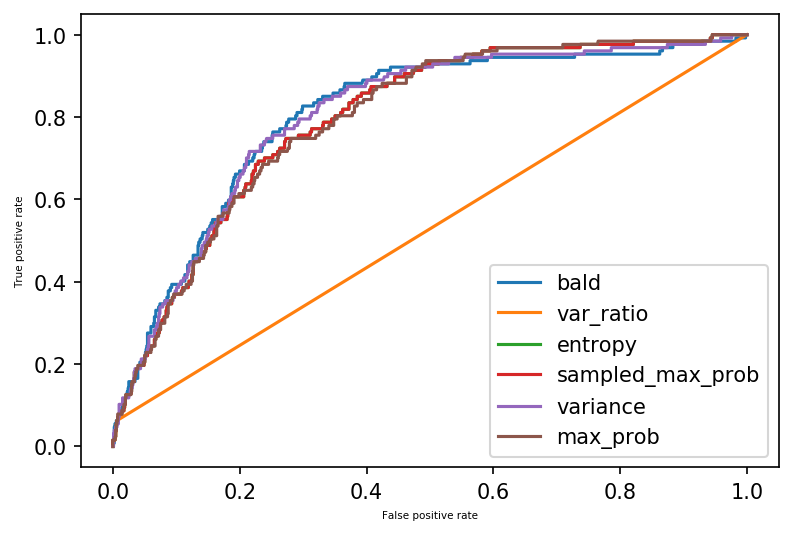

In [19]:
res_dir = '/notebook/uncertainty-estimation/workdir/results/cola/DPP_last/0/2021-05-19/17-42-48-0'
plot_roc_auc(res_dir)

bald: 0.9214285714285715
var_ratio: 0.8969319271332694
entropy: 0.9209731543624161
sampled_max_prob: 0.9209731543624161
variance: 0.9206855225311601
max_prob: 0.920613614573346


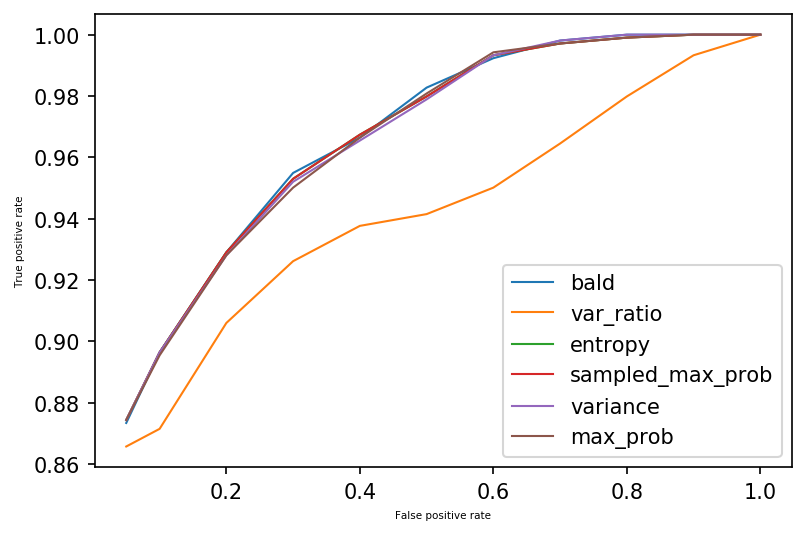

In [3]:
res_dir = '../workdir/results/dpp_masks_odd/cola/ht_dpp/True/60/50/0.3/101/17/'
plot_rejection_curves(res_dir)

bald: 0.9277809633027523
var_ratio: 0.927618501529052
entropy: 0.9359422782874617
sampled_max_prob: 0.9359422782874617
variance: 0.9292144495412844
max_prob: 0.9211391437308868


array(<function auc at 0x7f67600845f0>, dtype=object)

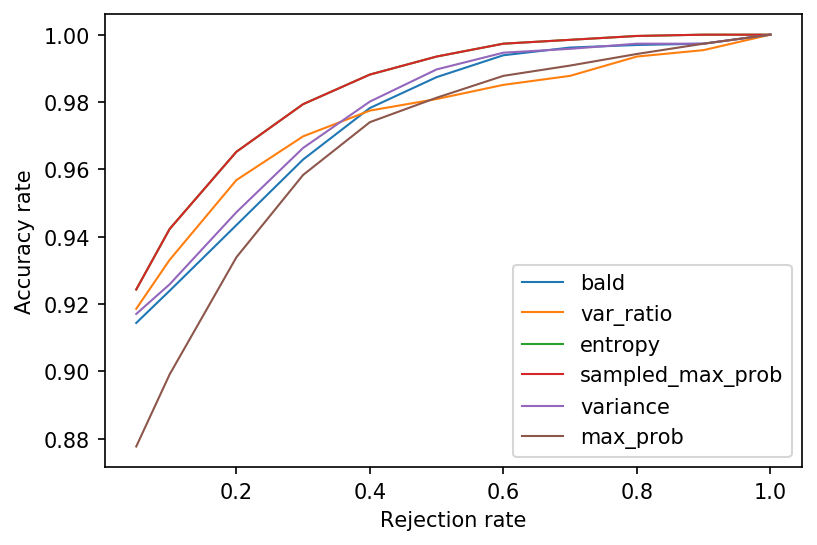

In [19]:
res_dir = '../workdir/results/aug/results/sst2/105/104/dev_inference.json'

with open(Path(res_dir)) as f:
    model_outputs = json.load(f)
    
plot_rejection_curve_aucs(np.asarray(model_outputs['probabilities']), 
                          np.asarray(model_outputs['true_labels']), 
                          np.asarray(model_outputs['sampled_probabilities']).transpose(1, 0, 2),
                          np.asarray(model_outputs['answers']), )

bald: 0.7040028763183126
var_ratio: 0.6970038350910834
entropy: 0.7170981144135506
sampled_max_prob: 0.7170981144135506
variance: 0.7066235218919782
max_prob: 0.7198945349952061


array(<function auc at 0x7f67600845f0>, dtype=object)

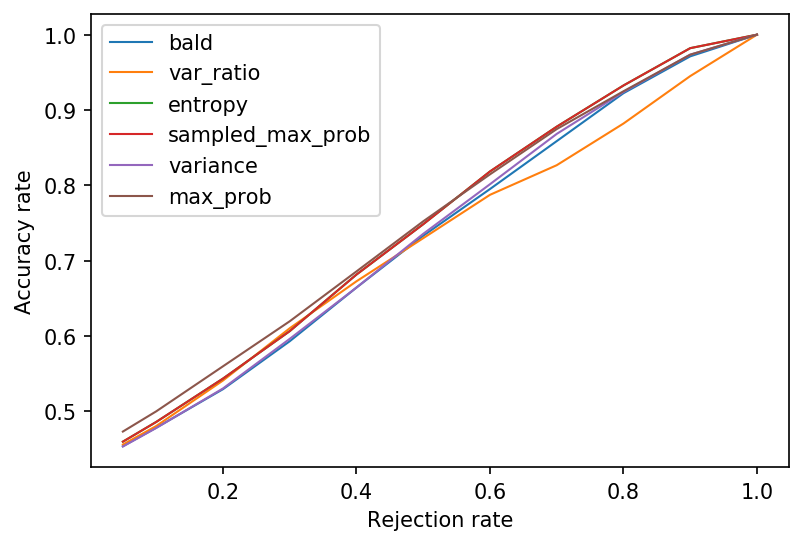

In [20]:
res_dir = '../workdir/results/aug/results/cola/105/104/dev_inference.json'

with open(Path(res_dir)) as f:
    model_outputs = json.load(f)
    
plot_rejection_curve_aucs(np.asarray(model_outputs['probabilities']), 
                          np.asarray(model_outputs['true_labels']), 
                          np.asarray(model_outputs['sampled_probabilities']).transpose(1, 0, 2),
                          np.asarray(model_outputs['answers']), )

bald: 0.8617851307189542
var_ratio: 0.8684640522875817
entropy: 0.8827614379084968
sampled_max_prob: 0.8827614379084968
variance: 0.8667892156862745
max_prob: 0.8666462418300654


array(<function auc at 0x7f67600845f0>, dtype=object)

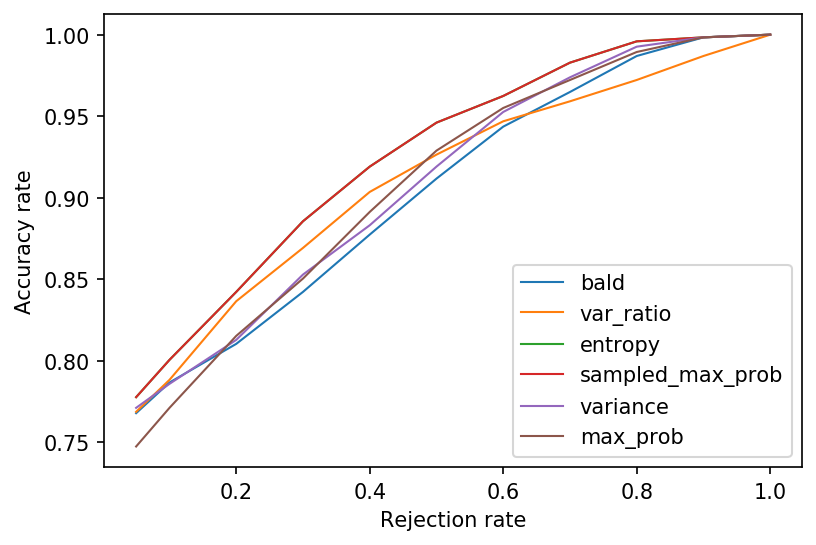

In [21]:
res_dir = '../workdir/results/aug/results/mrpc/105/104/dev_inference.json'

with open(Path(res_dir)) as f:
    model_outputs = json.load(f)
    
plot_rejection_curve_aucs(np.asarray(model_outputs['probabilities']), 
                          np.asarray(model_outputs['true_labels']), 
                          np.asarray(model_outputs['sampled_probabilities']).transpose(1, 0, 2),
                          np.asarray(model_outputs['answers']), )

# DDU MRPC

DDU ddu_scores: 0.8629537597234227
max_prob: 0.8324870354364737


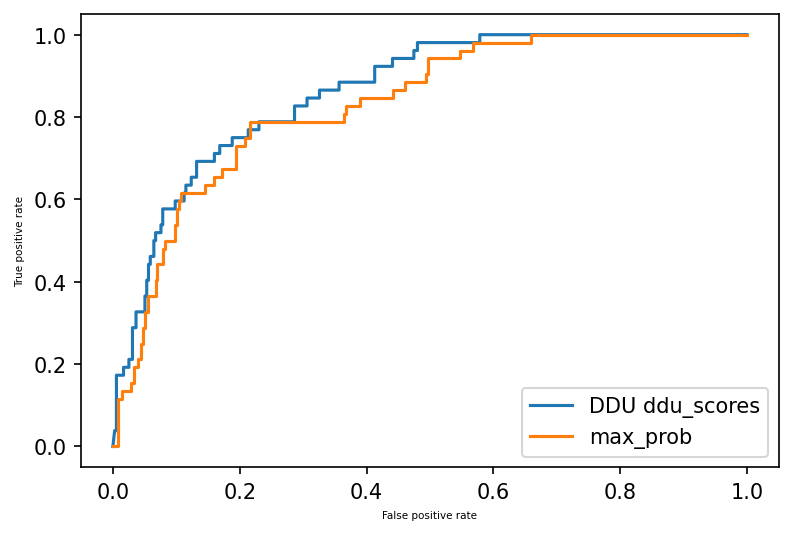

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, auc, roc_auc_score

res_path = '/home/jovyan/uncertainty-estimation/workdir/results/mrpc/ddu_/0.0/2022-01-21/16-07-42-0/'

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

plt.figure(dpi=150)

labels = np.asarray(model_outputs['eval_labels'])
probabilities = np.asarray(model_outputs['probabilities'])
predictions = np.argmax(probabilities, axis=-1)
errors = (labels != predictions).astype("uint8")

for ue_col in ['ddu_scores']:
    ue_scores = -np.asarray(model_outputs[ue_col])
    #ue_scores = np.clip(ue_scores, -1e5, 1e5)
    fpr, tpr, _ = roc_curve(errors, ue_scores)
    print(f"DDU {ue_col}:", roc_auc_score(errors, ue_scores))
    plt.plot(fpr, tpr, label=f"DDU {ue_col}")

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
print(f"max_prob:", roc_auc_score(errors, max_prob))
plt.plot(fpr, tpr, label="max_prob")
        
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

mahalanobis_distance: 0.8579840103716508
max_prob: 0.8324870354364737


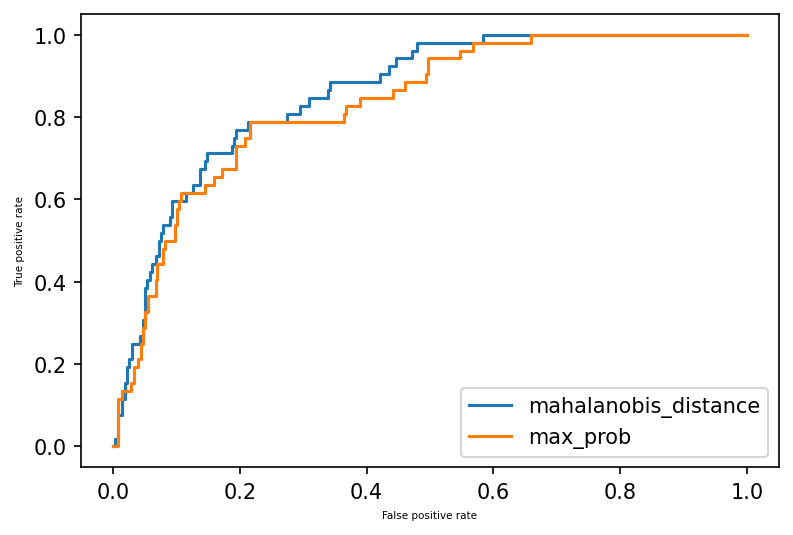

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, auc, roc_auc_score

res_path = '/home/jovyan/uncertainty-estimation/workdir/results/mrpc/maha_/0.0/2022-01-21/16-04-31-0'

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

plt.figure(dpi=150)

labels = np.asarray(model_outputs['eval_labels'])
probabilities = np.asarray(model_outputs['probabilities'])
predictions = np.argmax(probabilities, axis=-1)
errors = (labels != predictions).astype("uint8")

for ue_col in ['mahalanobis_distance']:
    ue_scores = np.asarray(model_outputs[ue_col])
    fpr, tpr, _ = roc_curve(errors, ue_scores)
    print(f"{ue_col}:", roc_auc_score(errors, ue_scores))
    plt.plot(fpr, tpr, label=f"{ue_col}")

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
print(f"max_prob:", roc_auc_score(errors, max_prob))
plt.plot(fpr, tpr, label="max_prob")
        
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

ddu: 0.9401089449541284
max_prob: 0.9354357798165137


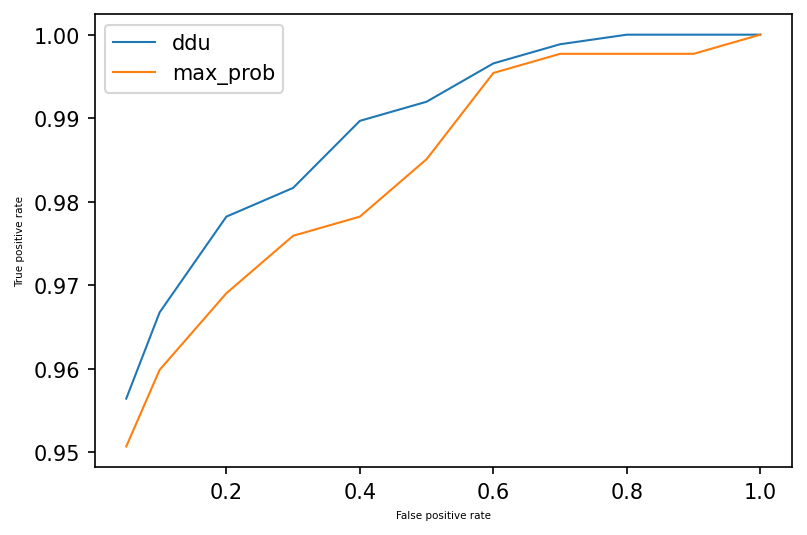

In [29]:
from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import re

from ue4nlp.ue_scores import *
from ue4nlp.ue_variation_ratio import ue_variation_ratio

from utils.plot_error_detection import * 
from utils.plot_error_detection import draw_charts
from utils.plot_error_detection import create_chart_data

import matplotlib.pyplot as plt
from utils.plot_error_detection import plot_error_detection, plot_rejection_curve_aucs

plt.figure(dpi=150)

ratio_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

ensemble_answers = predictions
sorted_indexes_ensemble = np.argsort(-ue_scores)
ens_scores = [
            get_score_ratio(sorted_indexes_ensemble, ensemble_answers, labels, ratio)
            for ratio in ratio_list
]

plt.plot(ratio_list, ens_scores, label='ddu', linewidth=1)
print(f"ddu:", auc(ratio_list, ens_scores))

model_ues = 1 - np.max(probabilities, axis=1)
model_answers = np.asarray(model_outputs['answers'])
sorted_indexes_model = np.argsort(-model_ues)
model_scores = [
    get_score_ratio(sorted_indexes_model, model_answers, labels, ratio)
    for ratio in ratio_list
]
print(f"max_prob:", auc(ratio_list, model_scores))
   
plt.plot(ratio_list, model_scores, label="max_prob", linewidth=1)
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

# NUQ MRPC

NUQ epistemic: 0.8442385310670228
NUQ aleatoric: 0.817065544880905
NUQ total: 0.8402592234665454
max_prob: 0.8193394349383207


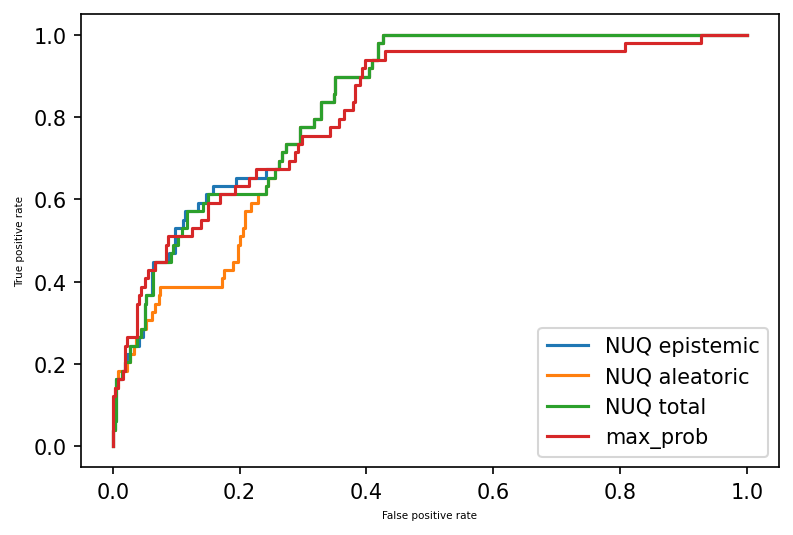

In [3]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, auc, roc_auc_score

res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/mrpc/MC_last/0.0/2021-09-14/10-05-43-'

res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_glue_for_model_series/electra-reg-True/mrpc/0.0/nuq/2021-09-22/07-09-01/results/91'
#res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/single_ue/mrpc/nuq/False/101/42'
#spectral norm

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

plt.figure(dpi=150)

labels = np.asarray(model_outputs['eval_labels'])
probabilities = np.asarray(model_outputs['probabilities'])
predictions = np.argmax(probabilities, axis=-1)
errors = (labels != predictions).astype("uint8")

for ue_col in ['epistemic','aleatoric', 'total']:
    ue_scores = np.asarray(model_outputs[ue_col])
    fpr, tpr, _ = roc_curve(errors, ue_scores)
    print(f"NUQ {ue_col}:", roc_auc_score(errors, ue_scores))
    plt.plot(fpr, tpr, label=f"NUQ {ue_col}")

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
print(f"max_prob:", roc_auc_score(errors, max_prob))
plt.plot(fpr, tpr, label="max_prob")
        
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

In [4]:
def get_score_ratio(sorted_indexes, answers, true_answers, ratio):
    last_index = int(len(sorted_indexes) * ratio)
    sel_indexes = sorted_indexes[:last_index]
    unsel_indexes = sorted_indexes[last_index:]

    sel_answers = true_answers[sel_indexes].tolist() + answers[unsel_indexes].tolist()
    sel_true_answers = (
        true_answers[sel_indexes].tolist() + true_answers[unsel_indexes].tolist()
    )
    score = accuracy_score(sel_true_answers, sel_answers)
    return score

nuq total: 0.9308823529411765
max_prob: 0.928186274509804


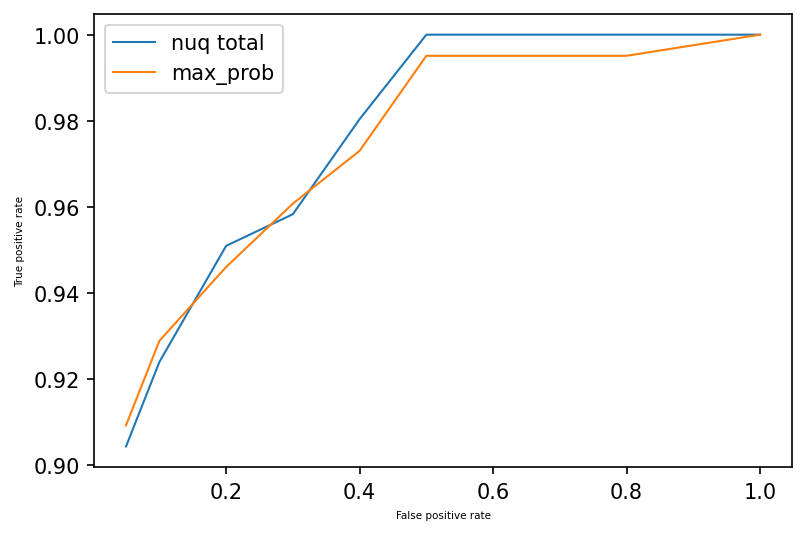

In [5]:
plt.figure(dpi=150)

ratio_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

ensemble_answers = predictions
sorted_indexes_ensemble = np.argsort(-np.asarray(model_outputs['total']))
ens_scores = [
            get_score_ratio(sorted_indexes_ensemble, ensemble_answers, labels, ratio)
            for ratio in ratio_list
]

plt.plot(ratio_list, ens_scores, label='nuq total', linewidth=1)
print(f"nuq total:", auc(ratio_list, ens_scores))
        
model_ues = 1 - np.max(probabilities, axis=1)
model_answers = np.asarray(model_outputs['answers'])
sorted_indexes_model = np.argsort(-model_ues)
model_scores = [
    get_score_ratio(sorted_indexes_model, model_answers, labels, ratio)
    for ratio in ratio_list
]
print(f"max_prob:", auc(ratio_list, model_scores))
   
plt.plot(ratio_list, model_scores, label="max_prob", linewidth=1)
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

In [6]:
from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import ujson as json
import re

from ue4nlp.ue_scores import *
from ue4nlp.ue_variation_ratio import ue_variation_ratio

from utils.plot_error_detection import * 
from utils.plot_error_detection import draw_charts
from utils.plot_error_detection import create_chart_data

import matplotlib.pyplot as plt
from utils.plot_error_detection import plot_error_detection, plot_rejection_curve_aucs

In [13]:
!ls ../workdir/final_res/run_glue_for_model_series/electra-raw/mrpc/0.0/ddpp_dpp/results

10671619  1084218  23419  42  4837  705525


In [17]:
seeds = [10671619,1084218,23419,42,4837,705525]
ratio_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [77]:
maha_scores = []
for seed in seeds:
    res_path = f'/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_glue_for_model_series/electra-raw-True/cola/0.0/mahalanobis/2021-09-22/07-53-28/results/{seed}'

    with open(Path(res_path) / 'dev_inference.json') as f:
            model_outputs = json.loads(f.read())

    mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
    probabilities = np.asarray(model_outputs['probabilities'])
    eval_labels = np.asarray(model_outputs['eval_labels'])

    predictions = np.argmax(probabilities, axis=-1)
    
    ensemble_answers = predictions
    sorted_indexes_ensemble = np.argsort(-mahalanobis_distance)
    ens_scores = [
                get_score_ratio(sorted_indexes_ensemble, ensemble_answers, eval_labels, ratio)
                for ratio in ratio_list
    ]
    maha_scores.append(ens_scores)
maha_scores = np.median(maha_scores, axis=0)

In [22]:
dpp_scores = []
for seed in seeds:
    res_path = f'../workdir/final_res/run_glue_for_model_series/electra-reg/mrpc/0.0/ddpp_dpp/results/{seed}'

    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())

    probabilities = np.asarray(model_outputs["probabilities"])
    eval_labels = np.asarray(model_outputs["true_labels"])
    sampled_probabilities = np.asarray(model_outputs["sampled_probabilities"]).transpose(1, 0, 2)
    answers = np.asarray(model_outputs['answers'])

    predictions = np.argmax(probabilities, axis=-1)
    errors = (eval_labels != predictions).astype("uint8")

    bald_dpp = sampled_max_prob(sampled_probabilities)
    
    ensemble_answers = np.asarray(sampled_probabilities).mean(1).argmax(-1)
    sorted_indexes_ensemble = np.argsort(-bald_dpp)
    ens_scores = [
                get_score_ratio(sorted_indexes_ensemble, ensemble_answers, eval_labels, ratio)
                for ratio in ratio_list
    ]
    dpp_scores.append(ens_scores)
dpp_scores = np.median(dpp_scores, axis=0)

In [99]:
de_scores = []
for seed in [0,1,2]:
    res_path=f'/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_glue_for_ensemble_series/2021-09-24/09-13-51/final_results/0/{seed}'

    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())

    probabilities = np.asarray(model_outputs["probabilities"])
    true_labels = np.asarray(model_outputs["true_labels"])
    sampled_probabilities = np.asarray(model_outputs["sampled_probabilities"]).transpose(1, 0, 2)
    answers = np.asarray(model_outputs['answers'])

    de_all_sampled = probability_variance(sampled_probabilities)
    ensemble_answers = np.asarray(sampled_probabilities).mean(1).argmax(-1)
    sorted_indexes_ensemble = np.argsort(-de_all_sampled)
    ens_scores = [
                get_score_ratio(sorted_indexes_ensemble, ensemble_answers, eval_labels, ratio)
                for ratio in ratio_list
    ]
    de_scores.append(ens_scores)
de_scores = np.median(de_scores, axis=0)

In [106]:
mc_scores = []
for seed in seeds:
    res_path = f'../workdir/run_glue_for_model_series/electra-reg/cola/0.0/mc/all/2021-09-23/09-20-07/results/{seed}'

    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())

    probabilities = np.asarray(model_outputs["probabilities"])
    true_labels = np.asarray(model_outputs["true_labels"])
    sampled_probabilities = np.asarray(model_outputs["sampled_probabilities"]).transpose(1, 0, 2)
    answers = np.asarray(model_outputs['answers'])

    mc_all_sampled = probability_variance(sampled_probabilities)
    ensemble_answers = np.asarray(sampled_probabilities).mean(1).argmax(-1)
    sorted_indexes_ensemble = np.argsort(-mc_all_sampled)
    ens_scores = [
                get_score_ratio(sorted_indexes_ensemble, ensemble_answers, eval_labels, ratio)
                for ratio in ratio_list
    ]
    mc_scores.append(ens_scores)
mc_scores = np.median(mc_scores, axis=0)

In [23]:
sr_scores = []
for seed in seeds:
    res_path = f'../workdir/final_res/run_glue_for_model_series/electra-raw/mrpc/0.0/ddpp_dpp/results/{seed}'

    with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())

    probabilities = np.asarray(model_outputs["probabilities"])
    true_labels = np.asarray(model_outputs["true_labels"])
    sampled_probabilities = np.asarray(model_outputs["sampled_probabilities"]).transpose(1, 0, 2)
    answers = np.asarray(model_outputs['answers'])
    model_ues = 1 - np.max(probabilities, axis=1)
    model_answers = np.asarray(model_outputs['answers'])
    sorted_indexes_model = np.argsort(-model_ues)
    model_scores = [
        get_score_ratio(sorted_indexes_model, model_answers, eval_labels, ratio)
        for ratio in ratio_list
    ]
    sr_scores.append(model_scores)
sr_scores = np.median(sr_scores, axis=0)

DPP BALD: 0.923468137254902
max.prob.: 0.9271139705882353


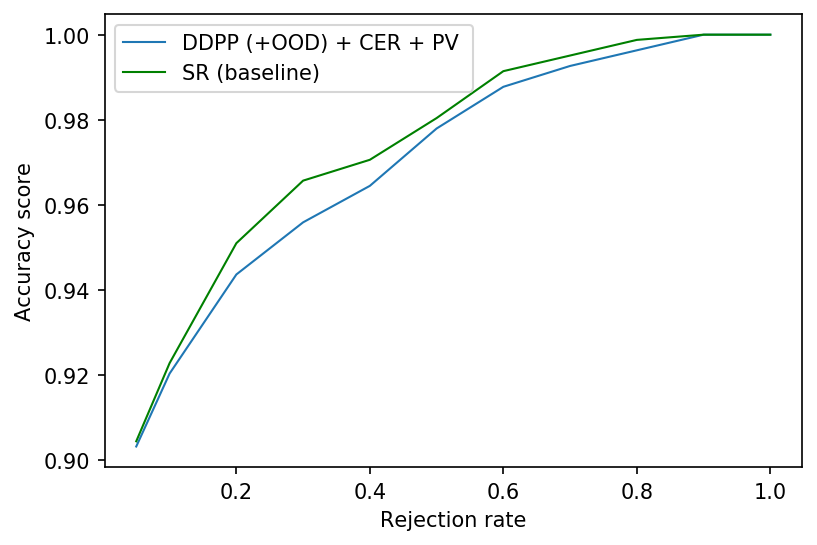

In [24]:
plt.figure(dpi=150)
ratio_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#plt.plot(ratio_list, de_scores, label='Deep Ensemble + SMP', linewidth=1,  c='mediumpurple')
#print(f"Deep Ensemble:", auc(ratio_list, de_scores))

plt.plot(ratio_list, dpp_scores, label='DDPP (+OOD) + CER + PV ', linewidth=1)
print(f"DPP BALD:", auc(ratio_list, dpp_scores))

#plt.plot(ratio_list, mc_scores, label='MC-Dropout + CER + PV ', linewidth=1)
#print(f"MC-All sampled max.prob.:", auc(ratio_list, mc_scores))

#plt.plot(ratio_list, maha_scores, label='MDSN', linewidth=1, c='r')
#print(f"Mahalanobis distance:", auc(ratio_list, maha_scores))
        
print(f"max.prob.:", auc(ratio_list, sr_scores))
   
plt.plot(ratio_list, sr_scores, label="SR (baseline)", linewidth=1, c='g')
plt.ylabel("Accuracy score", fontdict={"size": 10})
plt.xlabel("Rejection rate", fontdict={"size": 10})
plt.legend()

Mahalanobis: 0.8110031187463745
max_prob: 0.8256103349307631


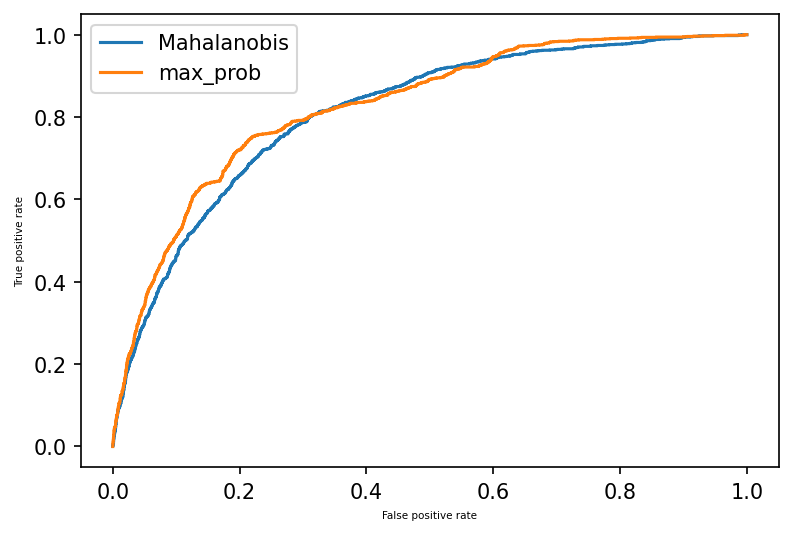

In [13]:
res_path='/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/newsgroup/maha_/0.0/2021-10-19/11-16-02-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="Mahalanobis")
print(f"Mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

Mahalanobis: 0.7847405889390192
max_prob: 0.8180074946240573


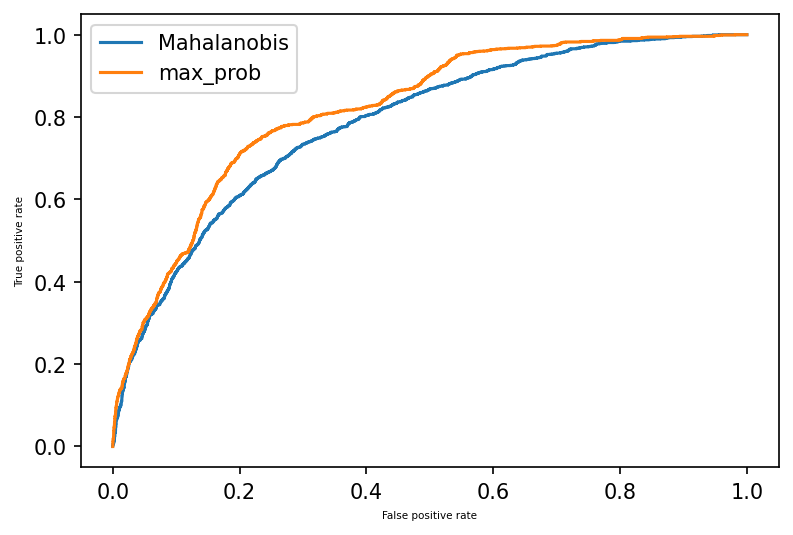

In [14]:
res_path='/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/newsgroup/maha_/0.0/2021-10-19/11-28-31-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="Mahalanobis")
print(f"Mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

bald: 0.8086039012458439
var_ratio: 0.6539798881751906
entropy: 0.8164164861935078
sampled_max_prob: 0.8205952612263286
variance: 0.8121129045754378
max_prob: 0.8247918235613086


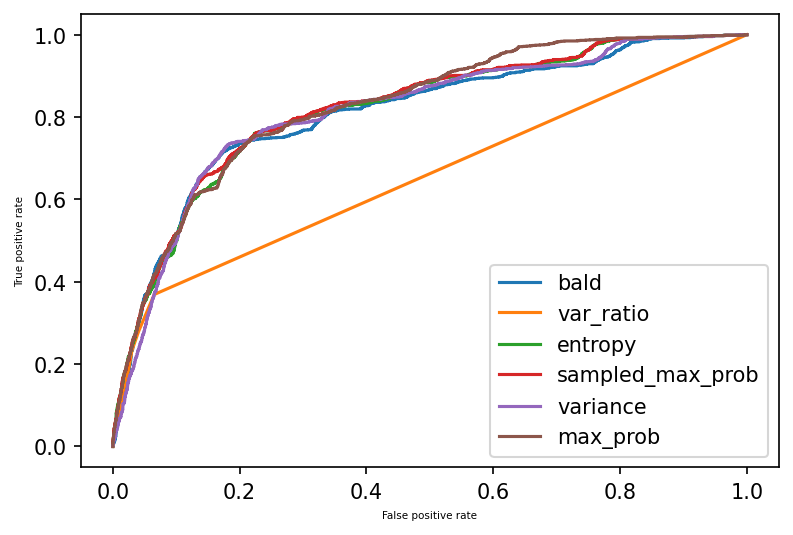

In [15]:
res_dir = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/newsgroup/mc-dpp_last/0.0/2021-10-19/12-03-57-0'
plot_roc_auc(res_dir)

bald: 0.8390738673718982
var_ratio: 0.7625194535194189
entropy: 0.842873021854025
sampled_max_prob: 0.8448639153983296
variance: 0.8363374085540358
max_prob: 0.8255740893398618


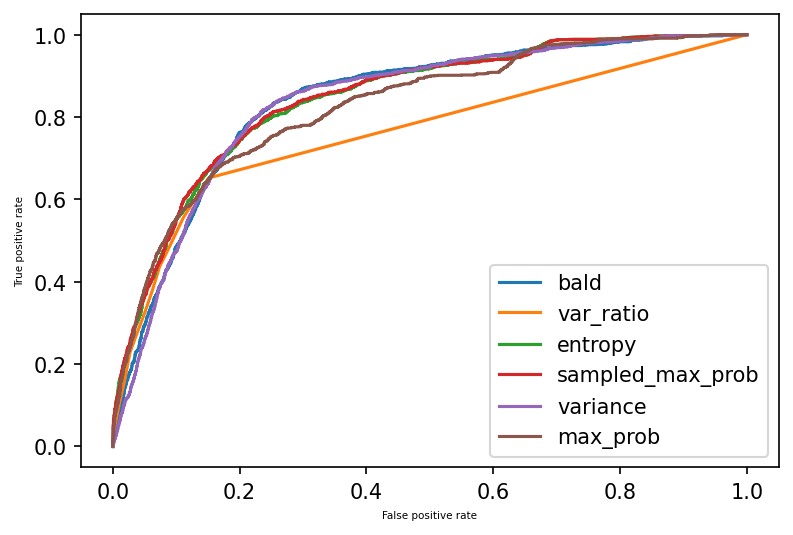

In [5]:
res_dir = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/newsgroup/mc_all/0.0/2021-10-19/12-16-49-0'
plot_roc_auc(res_dir)

mahalanobis: 0.7720930232558139
sum sampled mahalanobis: 0.7807582032494425
max_prob: 0.7146862057980248


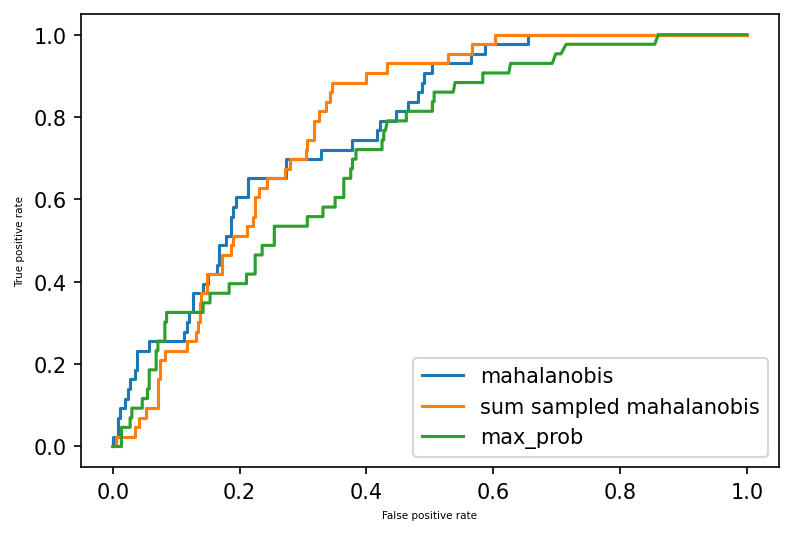

In [21]:
res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_glue_for_ensemble_series/2021-10-19/12-56-53/final_results/0/3'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
sampled_mahalanobis_distance = np.asarray(model_outputs['sampled_mahalanobis_distance'])
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="mahalanobis")
print(f"mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

agg_type = 'sum'
agg_func = None
if agg_type == 'mean':
    agg_func = np.mean
elif agg_type == 'max':
    agg_func = np.max
elif agg_type == 'sum':
    agg_func = np.sum
    
fpr, tpr, _ = roc_curve(errors, agg_func(sampled_mahalanobis_distance, axis=0))
plt.plot(fpr, tpr, label=f"{agg_type} sampled mahalanobis")
print(f"{agg_type} sampled mahalanobis:", roc_auc_score(errors, agg_func(sampled_mahalanobis_distance, axis=0)))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

mahalanobis: 0.7994960806270996
sum sampled mahalanobis: 0.8318439716312058
max_prob: 0.745337812616648


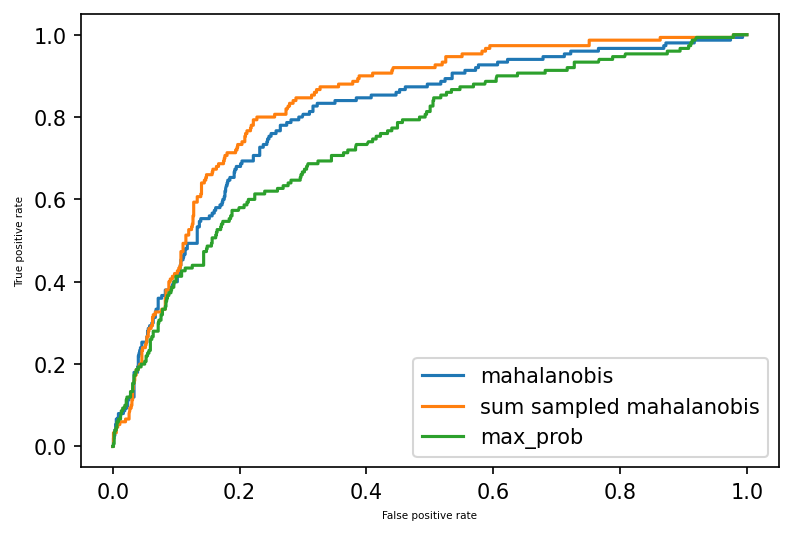

In [25]:
res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_glue_for_ensemble_series/2021-10-19/13-08-59/final_results/0/2'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
sampled_mahalanobis_distance = np.asarray(model_outputs['sampled_mahalanobis_distance'])
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="mahalanobis")
print(f"mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

agg_type = 'sum'
agg_func = None
if agg_type == 'mean':
    agg_func = np.mean
elif agg_type == 'max':
    agg_func = np.max
elif agg_type == 'sum':
    agg_func = np.sum
    
fpr, tpr, _ = roc_curve(errors, agg_func(sampled_mahalanobis_distance, axis=0))
plt.plot(fpr, tpr, label=f"{agg_type} sampled mahalanobis")
print(f"{agg_type} sampled mahalanobis:", roc_auc_score(errors, agg_func(sampled_mahalanobis_distance, axis=0)))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

mahalanobis: 0.821711904999501
sum sampled mahalanobis: 0.8130758739979377
max_prob: 0.7090983933739148


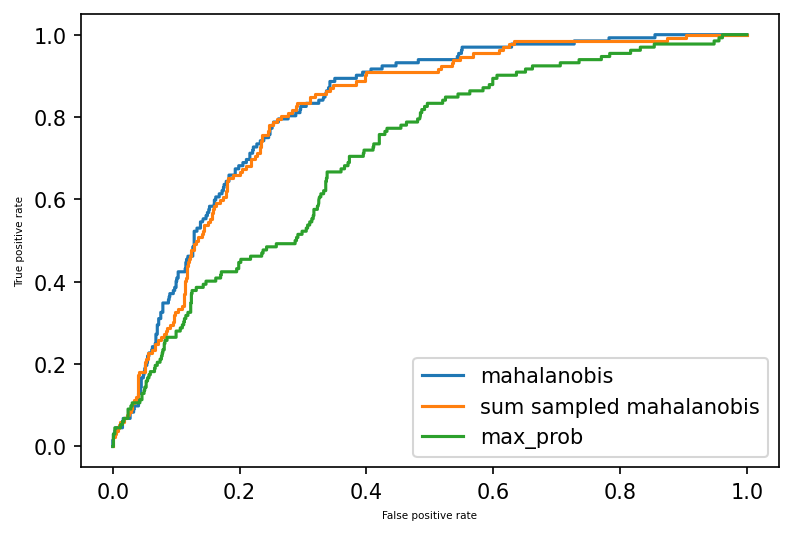

In [17]:
res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/run_glue_for_model_series/electra-raw-True/cola/0.0/mc_mahalanobis/2021-10-02/13-10-18/results/51'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
sampled_mahalanobis_distance = np.asarray(model_outputs['sampled_mahalanobis_distance'])
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['eval_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="mahalanobis")
print(f"mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

agg_type = 'sum'
agg_func = None
if agg_type == 'mean':
    agg_func = np.mean
elif agg_type == 'max':
    agg_func = np.max
elif agg_type == 'sum':
    agg_func = np.sum
    
fpr, tpr, _ = roc_curve(errors, agg_func(sampled_mahalanobis_distance, axis=0))
plt.plot(fpr, tpr, label=f"{agg_type} sampled mahalanobis")
print(f"{agg_type} sampled mahalanobis:", roc_auc_score(errors, agg_func(sampled_mahalanobis_distance, axis=0)))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

maha: 0.9287377450980392
sampled maha: 0.9297794117647059
max_prob: 0.9231617647058823


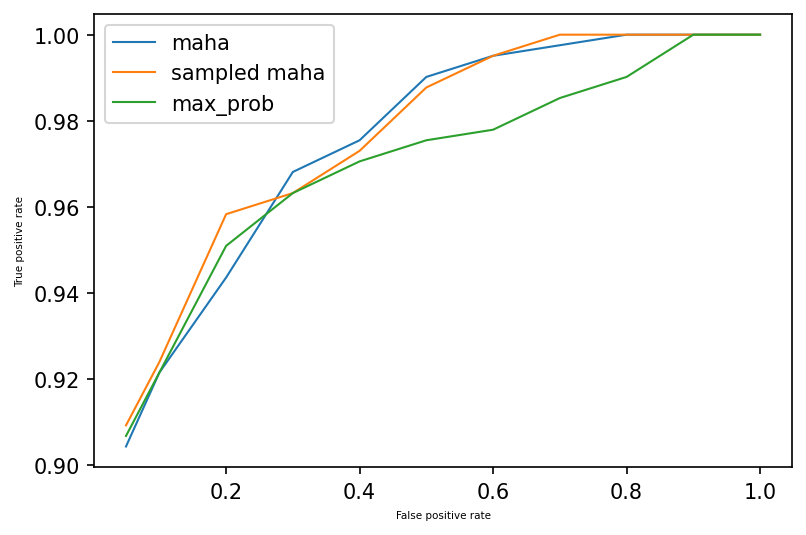

In [9]:
plt.figure(dpi=150)

ratio_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

ensemble_answers = predictions
sorted_indexes_ensemble = np.argsort(-mahalanobis_distance)
ens_scores = [
            get_score_ratio(sorted_indexes_ensemble, ensemble_answers, eval_labels, ratio)
            for ratio in ratio_list
]

plt.plot(ratio_list, ens_scores, label='maha', linewidth=1)
print(f"maha:", auc(ratio_list, ens_scores))

sorted_indexes_ensemble = np.argsort(-agg_func(sampled_mahalanobis_distance, axis=0))
ens_scores = [
            get_score_ratio(sorted_indexes_ensemble, ensemble_answers, eval_labels, ratio)
            for ratio in ratio_list
]

plt.plot(ratio_list, ens_scores, label='sampled maha', linewidth=1)
print(f"sampled maha:", auc(ratio_list, ens_scores))
        
model_ues = 1 - np.max(probabilities, axis=1)
model_answers = np.asarray(model_outputs['answers'])
sorted_indexes_model = np.argsort(-model_ues)
model_scores = [
    get_score_ratio(sorted_indexes_model, model_answers, eval_labels, ratio)
    for ratio in ratio_list
]
print(f"max_prob:", auc(ratio_list, model_scores))
   
plt.plot(ratio_list, model_scores, label="max_prob", linewidth=1)
plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

sngp: 0.7928706716526638
max_prob: 0.7573454421834782


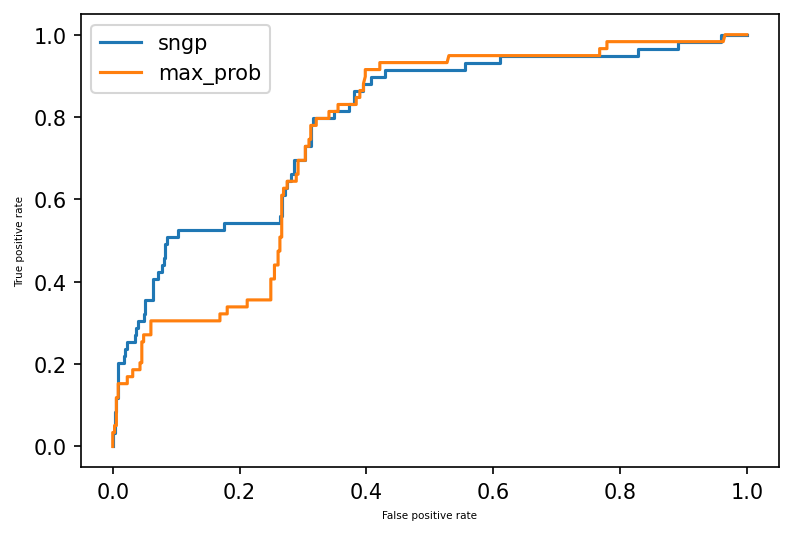

In [10]:
res_path = '/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/mrpc/MC_last/0.0/2021-09-14/12-39-49-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
sngp = np.asarray(model_outputs['stds'])[:, 1]
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, sngp)
plt.plot(fpr, tpr, label="sngp")
print(f"sngp:", roc_auc_score(errors, sngp))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

Mahalanobis: 0.8449497446037239
max_prob: 0.8405558301752073


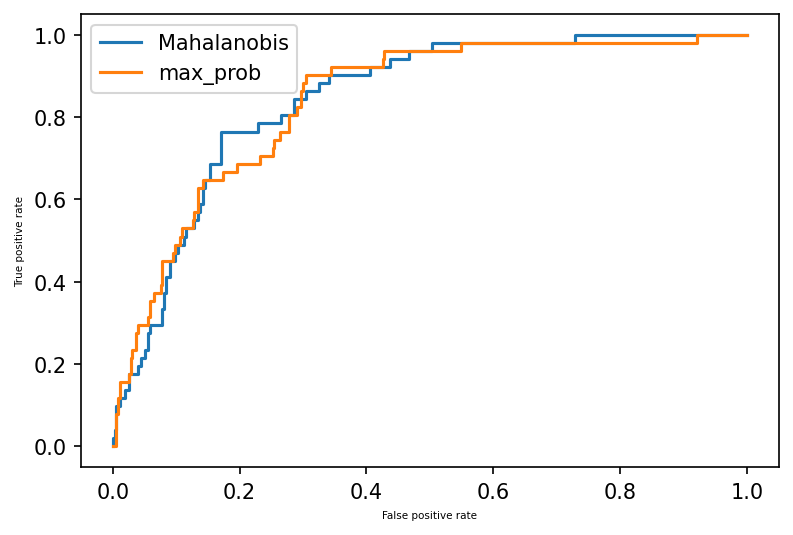

In [11]:
res_path='/mnt/users/avazhentsev/uncertainty-estimation/workdir/results/mrpc/mc_all/0.0/2021-09-15/20-46-34-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance']).max(0)
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="Mahalanobis")
print(f"Mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

In [12]:
np.asarray(model_outputs['mahalanobis_distance'])[:, 0]

array([ 833.65401527, 1022.69247781,  974.77473058,  810.80520786,
        951.12474962,  859.79879096,  933.03494526,  938.53785653,
        934.26132761,  913.3850101 , 1038.25158317,  804.65884269,
        913.76049888,  956.01753137,  891.83420499,  844.25319078,
        919.13115751, 1067.49722837,  857.844844  ,  961.72640311])

In [13]:
!cat /mnt/users/avazhentsev/uncertainty-estimation/workdir/results/mrpc/mc_all/0.0/2021-09-15/20-46-34-0/run_glue.log

[2021-09-15 20:46:34,531][__main__][INFO] - Work dir: /mnt/users/avazhentsev/uncertainty-estimation/workdir/results/mrpc/mc_all/0.0/2021-09-15/20-46-34-0
[2021-09-15 20:46:40,869][__main__][INFO] - Seed: 17
[2021-09-15 20:46:40,869][__main__][INFO] - Load dataset.
[2021-09-15 20:46:41,680][datasets.builder][WARNING] - Reusing dataset glue (../workdir/cache/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)
[2021-09-15 20:46:41,691][__main__][INFO] - Done with loading the dataset.
[2021-09-15 20:46:41,691][__main__][INFO] - Number of labels: 2
[2021-09-15 20:46:45,894][utils_models][INFO] - Replaced ELECTRA's head
[2021-09-15 20:46:45,902][datasets.arrow_dataset][WARNING] - Loading cached processed dataset at ../workdir/cache/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad/cache-eaeb8718b8898d59.arrow
[2021-09-15 20:46:45,909][datasets.arrow_dataset][WARNING] - Loading cached processed dataset at ../workdir/cache/glue/mrpc/

In [54]:
!ls /mnt/users/avazhentsev/uncertainty-estimation/workdir/results/mrpc/mc_all/0.0/2021-09-15/20-37-39-0

calibration_indexes.pkl  special_tokens_map.json  training_indexes.pkl
config.json		 tokenizer.json		  vocab.txt
pytorch_model.bin	 tokenizer_config.json
run_glue.log		 training_args.bin


In [3]:
from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import ujson as json
import re

from ue4nlp.ue_scores import *
from ue4nlp.ue_variation_ratio import ue_variation_ratio

from utils.plot_error_detection import * 
from utils.plot_error_detection import draw_charts
from utils.plot_error_detection import create_chart_data

import matplotlib.pyplot as plt
from utils.plot_error_detection import plot_error_detection, plot_rejection_curve_aucs

bald: 0.82353163219085
var_ratio: 0.7008719613468217
entropy: 0.8234259399063868
sampled_max_prob: 0.8234259399063868
variance: 0.8242110825909709
max_prob: 0.7963422920126831
CPU times: user 91.3 ms, sys: 239 µs, total: 91.6 ms
Wall time: 89.6 ms


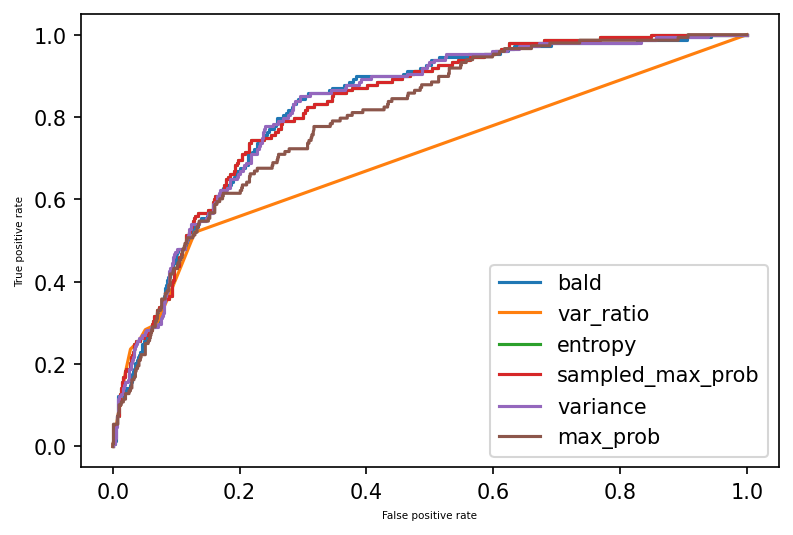

In [98]:
%%time

res_dir = '../workdir/results/mc_masks/cola/MC/all/20/0.1/101/17'
plot_roc_auc(res_dir)

bald: 0.9245206136145733
var_ratio: 0.9121524448705657
entropy: 0.9246644295302013
sampled_max_prob: 0.9246644295302013
variance: 0.9245445829338446
max_prob: 0.9211409395973155


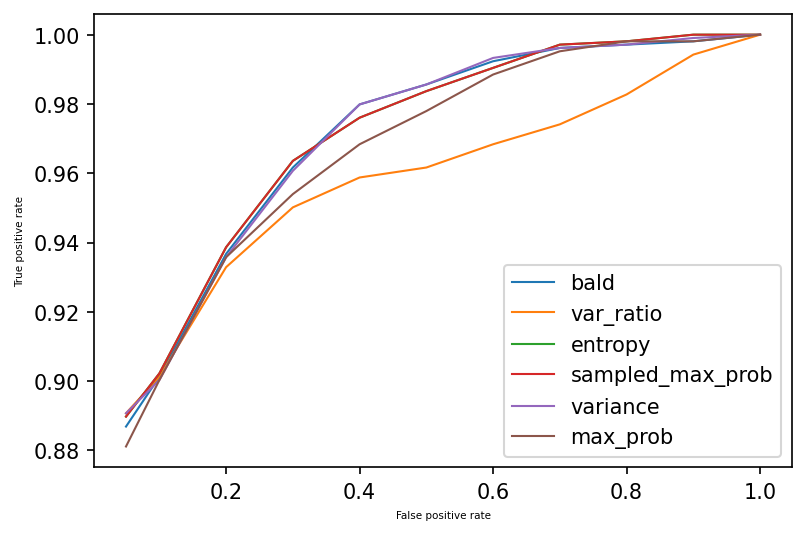

In [99]:
plot_rejection_curves(res_dir)

In [100]:
with open(Path(res_dir) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())
    
probabilities = np.asarray(model_outputs["probabilities"])
true_labels = np.asarray(model_outputs["true_labels"])
sampled_probabilities = np.asarray(model_outputs["sampled_probabilities"]).transpose(1, 0, 2)
answers = np.asarray(model_outputs['answers'])

In [154]:
import pandas as pd

def get_score_ratio(sorted_indexes, answers, true_answers, ratio):
    last_index = int(len(sorted_indexes) * ratio)
    sel_indexes = sorted_indexes[:last_index]
    unsel_indexes = sorted_indexes[last_index:]

    sel_answers = answers[unsel_indexes].tolist()
    sel_true_answers = true_answers[unsel_indexes].tolist()
    
    #sel_answers = true_answers[sel_indexes].tolist() + answers[unsel_indexes].tolist()
    #sel_true_answers = true_answers[sel_indexes].tolist() + true_answers[unsel_indexes].tolist()
    
    score = accuracy_score(sel_true_answers, sel_answers)
    
    return score

def calc_rejection_table(probabilities, labels, sampled_probabilities, model_answers, methods, ratio_list=None):
    if ratio_list is None:
        ratio_list = [0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
    
    predictions = np.argmax(probabilities, axis=-1)
    errors = (labels != predictions).astype("uint8")
    
    model_ues = 1 - np.max(probabilities, axis=1)
    sorted_indexes_model = np.argsort(-model_ues)
    
    results = {}
    model_scores = [get_score_ratio(sorted_indexes_model, model_answers, labels, ratio) for ratio in ratio_list]  
    results['max_prob'] = model_scores

    for name, method_function in methods.items():
        ue_scores = method_function(sampled_probabilities)
        
        ensemble_answers = np.asarray(sampled_probabilities).mean(1).argmax(-1)
        sorted_indexes_ensemble = np.argsort(-ue_scores)
        
        ens_scores = [get_score_ratio(sorted_indexes_ensemble, ensemble_answers, labels, ratio) for ratio in ratio_list]
        results[name] = ens_scores
    results = pd.DataFrame(results).T
    results.columns = [f'{int(ratio*100)}%' for ratio in ratio_list]
    return results

In [155]:
methods = {
    "bald": bald,
    "var_ratio": var_ratio,
    "entropy": mean_entropy,
    "sampled_max_prob": sampled_max_prob,
    "variance": probability_variance,
}

In [156]:
uncertainty_ratio = calc_rejection_table(probabilities, true_labels, sampled_probabilities, answers, methods, ratio_list=[0, 0.1, 0.2, 0.3])

In [157]:
uncertainty_ratio

,0%,10%,20%,30%
max_prob,0.858102,0.889244,0.919760,0.934337
bald,0.867689,0.890309,0.920958,0.945280
var_ratio,0.867689,0.890309,0.916168,0.928865
entropy,0.867689,0.891374,0.923353,0.948016
sampled_max_prob,0.867689,0.891374,0.923353,0.948016
variance,0.867689,0.889244,0.919760,0.943912


In [106]:
def get_score_ratio(sorted_indexes, answers, true_answers, ratio):
    last_index = int(len(sorted_indexes) * ratio)
    sel_indexes = sorted_indexes[:last_index]
    unsel_indexes = sorted_indexes[last_index:]
    
    sel_answers = true_answers[sel_indexes].tolist() + answers[unsel_indexes].tolist()
    sel_true_answers = true_answers[sel_indexes].tolist() + true_answers[unsel_indexes].tolist()
    
    #sel_answers = answers[unsel_indexes].tolist()
    #sel_true_answers = true_answers[unsel_indexes].tolist()
    score = accuracy_score(sel_true_answers, sel_answers)
    
    return score

In [107]:
from sklearn.preprocessing import MinMaxScaler

def plot_rejection_curve_aucs(
    probabilities,
    labels,
    sampled_probabilities,
    model_answers,
    stds=None,
    methods=None,
    use_means=False,
    verbose=True,
):
    """
    N - number of points in the dataset, C - number of classes, R - number of sampling runs
    all arguments expect to be np.array
    :param probabilities:  probabilities by model without dropout, NxC
    :param labels: true labels for classification, N
    :param sampled_probabilities: probabilities sampled by dropout, NxRxC
    :param stds:  stds by model with SNGP, NxC
    :return: None, make roc curve plot for error detection
    """
    if methods is None:
        methods = default_methods

    predictions = np.argmax(probabilities, axis=-1)
    errors = (labels != predictions).astype("uint8")

    if verbose:
        plt.figure(dpi=150)
    aucs = []
    
    ratio_list = [0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    min_val = 1
    
    scaler = MinMaxScaler()    
    for name, method_function in methods.items():
        if not use_means:
            ue_scores = method_function(sampled_probabilities)
        else:
            ue_scores = method_function(sampled_probabilities, probabilities)
            
        ensemble_answers = np.asarray(sampled_probabilities).mean(1).argmax(-1)
        sorted_indexes_ensemble = np.argsort(-ue_scores)
        ens_scores = [get_score_ratio(sorted_indexes_ensemble, ensemble_answers, labels, ratio) for ratio in ratio_list]
        ens_scores = scaler.fit_transform(np.array(ens_scores).reshape(-1, 1))

        if verbose:
            plt.plot(ratio_list, ens_scores, label=name, linewidth=1)
            print(f"{name}:", auc(ratio_list, ens_scores))
        aucs.append(auc(ratio_list, ens_scores))
        min_val = min(min_val, np.min(ens_scores))
        
    model_ues = 1 - np.max(probabilities, axis=1)
    sorted_indexes_model = np.argsort(-model_ues)
    model_scores = [get_score_ratio(sorted_indexes_model, model_answers, labels, ratio) for ratio in ratio_list]
    model_scores = scaler.fit_transform(np.array(model_scores).reshape(-1, 1))
    
    if verbose:    
        print(f"max_prob:", auc(ratio_list, model_scores))
    aucs.append(auc(ratio_list, model_scores))

    if verbose:
        plt.plot(ratio_list, model_scores, label="max_prob", linewidth=1)
        plt.ylabel("True positive rate", fontdict={"size": 5})
        plt.xlabel("False positive rate", fontdict={"size": 5})
        plt.legend()
    return np.asarray(aucs)

bald: 0.7610507246376813
var_ratio: 0.6682971014492752
entropy: 0.7626811594202897
sampled_max_prob: 0.7626811594202897
variance: 0.7619565217391306
max_prob: 0.7506756756756756


array([0.76105072, 0.6682971 , 0.76268116, 0.76268116, 0.76195652,
       0.75067568])

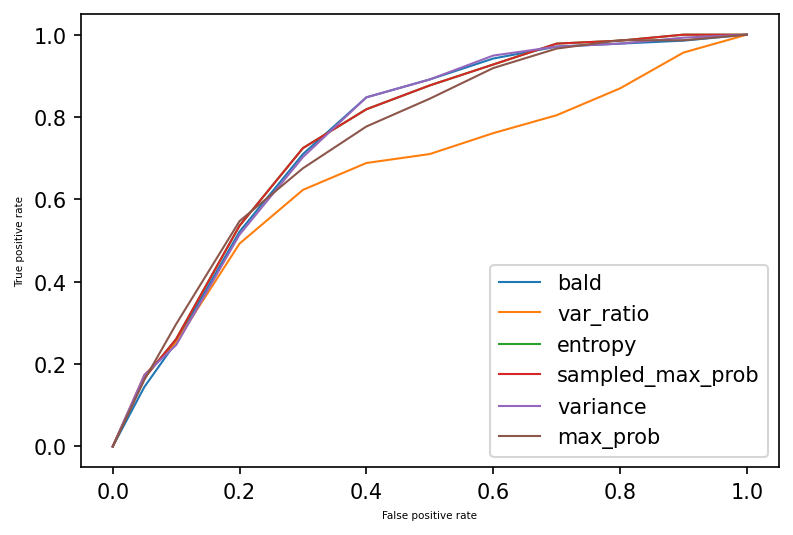

In [108]:
plot_rejection_curve_aucs(probabilities, true_labels, sampled_probabilities, answers)

bald: 0.82353163219085
var_ratio: 0.7008719613468217
entropy: 0.8234259399063868
sampled_max_prob: 0.8234259399063868
variance: 0.8242110825909709
max_prob: 0.7963422920126831


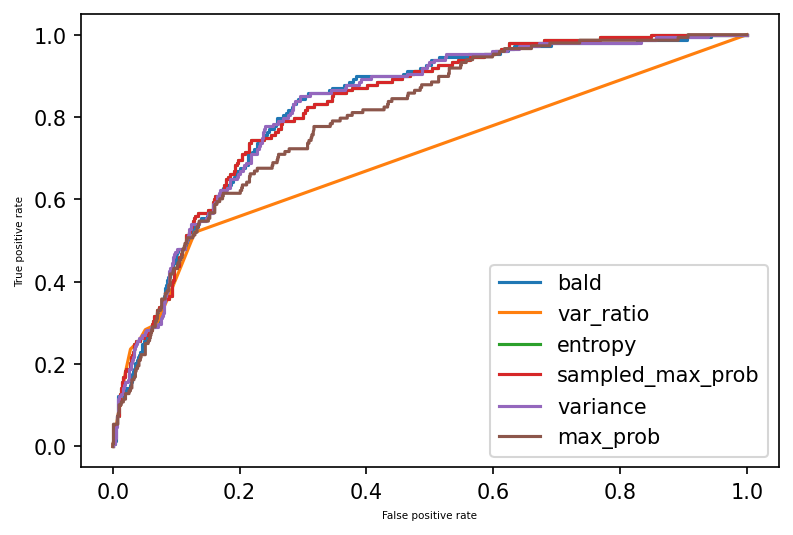

In [109]:
plot_roc_auc(res_dir)

In [22]:
!ls ../../workdir/run_tasks_for_model_series/electra_raw_sn/sst2/imdb/l_nuq/results

10671619  1084218  23419  42  4837  705525


NUQ epistemic: 0.9790424625644824
NUQ aleatoric: 0.9832361165578298
NUQ total: 0.9806718273514758
max_prob: 0.9795196910254405
mahalanobis_distance: 0.9853875500382645


<Figure size 900x600 with 0 Axes>

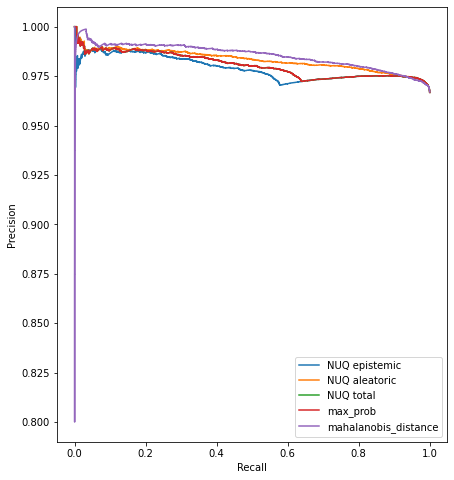

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, auc, roc_auc_score, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
path = '../../workdir/run_tasks_for_model_series/electra_raw_sn/sst2/imdb/'
seed = 23419
res_path = f'{path}/nuq/results/{seed}'

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

plt.figure(dpi=150)
_, ax = plt.subplots(figsize=(7, 8))

labels = np.asarray(model_outputs['eval_labels'])
probabilities = np.asarray(model_outputs['probabilities'])
predictions = np.argmax(probabilities, axis=-1)
labels = (labels == np.max(labels)).astype("uint8")

for ue_col in ['epistemic','aleatoric', 'total']:
    ue_scores = np.asarray(model_outputs[ue_col])
    pr, rec, _ = precision_recall_curve(labels, ue_scores)
    display = PrecisionRecallDisplay(precision=pr, recall=rec)

    display.plot(ax=ax, name=f"NUQ {ue_col}")
    print(f"NUQ {ue_col}:", average_precision_score(labels, ue_scores))

max_prob = 1 - np.max(probabilities, axis=-1)
pr, rec, _ = precision_recall_curve(labels, ue_scores)
display = PrecisionRecallDisplay(precision=pr, recall=rec)
display.plot(ax=ax, name=f"max_prob")    
print(f"max_prob:", average_precision_score(labels, max_prob))


res_path = f'{path}/mahalanobis/results/{seed}'

with open(Path(res_path) / 'dev_inference.json') as f:
    model_outputs = json.loads(f.read())

labels = np.asarray(model_outputs['eval_labels'])
probabilities = np.asarray(model_outputs['probabilities'])
predictions = np.argmax(probabilities, axis=-1)

for ue_col in ['mahalanobis_distance']:
    ue_scores = np.asarray(model_outputs[ue_col])
    pr, rec, _ = precision_recall_curve(labels, ue_scores)
    display = PrecisionRecallDisplay(precision=pr, recall=rec)

    display.plot(ax=ax, name=f"{ue_col}")
    print(f"{ue_col}:", average_precision_score(labels, ue_scores))

plt.legend()

In [3]:
from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import re

from ue4nlp.ue_scores import *
from ue4nlp.ue_variation_ratio import ue_variation_ratio

from utils.plot_error_detection import * 
from utils.plot_error_detection import draw_charts
from utils.plot_error_detection import create_chart_data

import matplotlib.pyplot as plt
from utils.plot_error_detection import plot_error_detection, plot_rejection_curve_aucs

Mahalanobis: 0.8287037037037037
max_prob: 0.8500289351851852


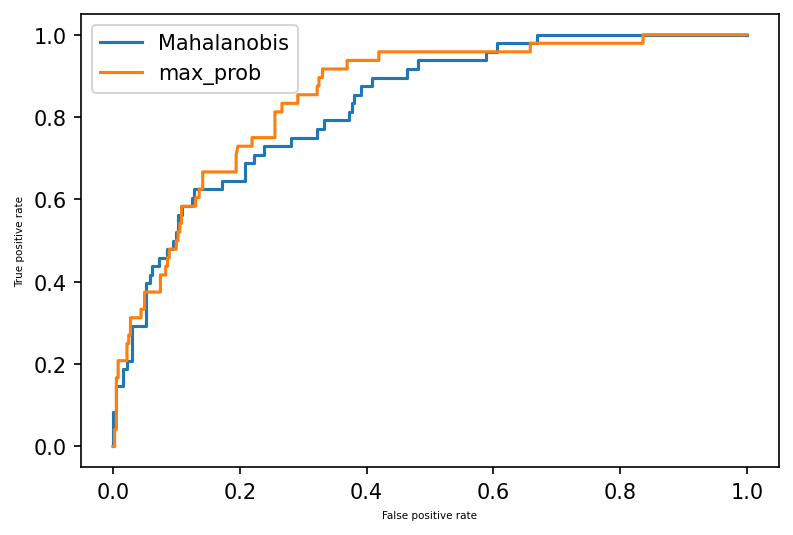

In [8]:
#raw model 
res_path='/home/jovyan/uncertainty-estimation/workdir/results/mrpc/maha_/0.0/2022-02-22/16-57-03-0/'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="Mahalanobis")
print(f"Mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

Mahalanobis: 0.6560895325872285
max_prob: 0.6814680710994075


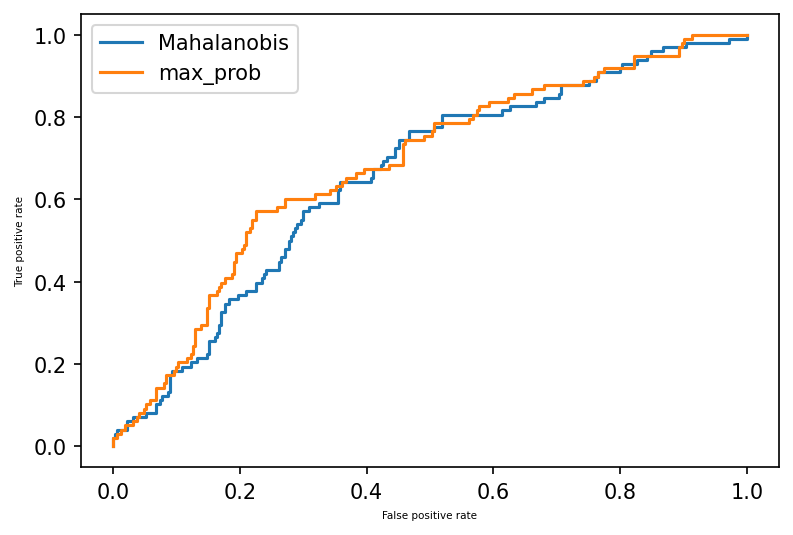

In [14]:
#sn attentions

res_path='/home/jovyan/uncertainty-estimation/workdir/results/mrpc/maha_/0.0/2022-02-22/16-56-50-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
mahalanobis_distance = np.asarray(model_outputs['mahalanobis_distance'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, mahalanobis_distance)
plt.plot(fpr, tpr, label="Mahalanobis")
print(f"Mahalanobis:", roc_auc_score(errors, mahalanobis_distance))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

aleatoric: 0.2771256216662616
epistemic: 0.7404397986624538
max_prob: 0.6306786256569474


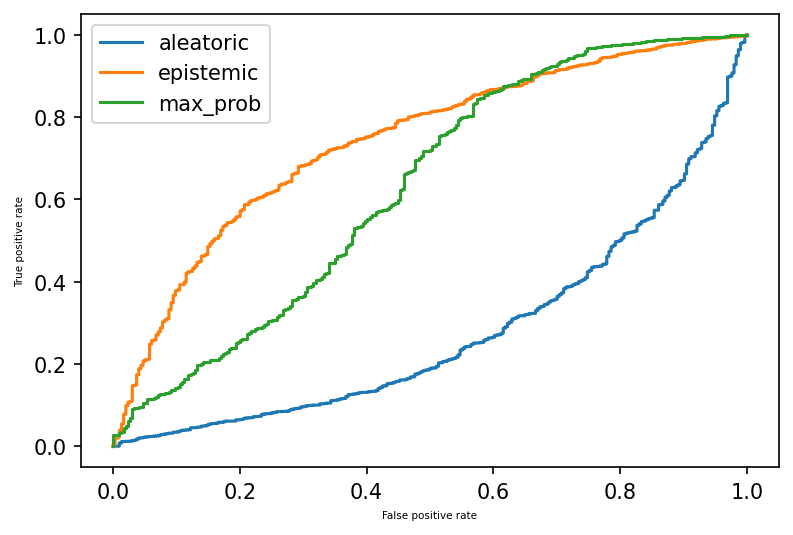

In [6]:
#None model 
res_path='/home/jovyan/uncertainty-estimation/workdir/results/clinc_oos/nuq_/0.1/2022-03-02/11-06-27-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
epistemic = np.asarray(model_outputs['epistemic'])
aleatoric = np.asarray(model_outputs['aleatoric'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, aleatoric)
plt.plot(fpr, tpr, label="aleatoric")
print(f"aleatoric:", roc_auc_score(errors, aleatoric))

fpr, tpr, _ = roc_curve(errors, epistemic)
plt.plot(fpr, tpr, label="epistemic")
print(f"epistemic:", roc_auc_score(errors, epistemic))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()

aleatoric: 0.2781249264976832
epistemic: 0.7407726824882854
max_prob: 0.6306786256569474


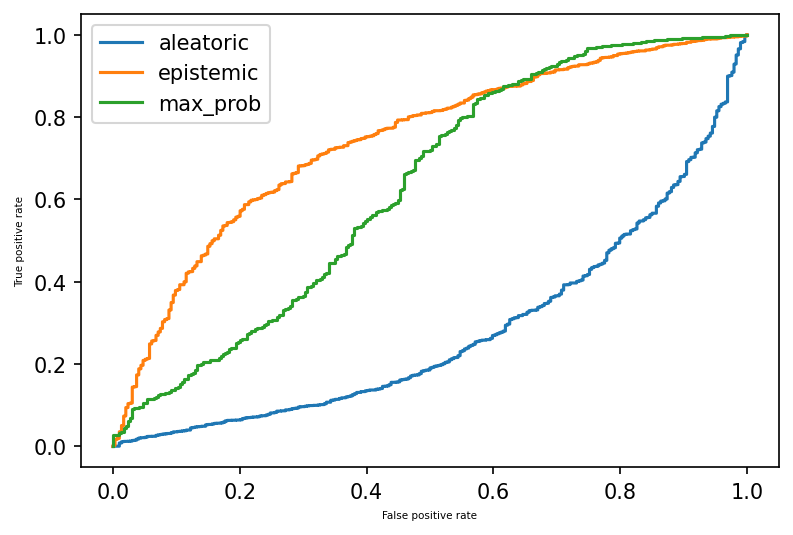

In [7]:
#Tune model 
res_path='/home/jovyan/uncertainty-estimation/workdir/results/clinc_oos/nuq_/0.1/2022-03-02/11-05-55-0'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.loads(f.read())
          
epistemic = np.asarray(model_outputs['epistemic'])
aleatoric = np.asarray(model_outputs['aleatoric'])
probabilities = np.asarray(model_outputs['probabilities'])
eval_labels = np.asarray(model_outputs['true_labels'])

predictions = np.argmax(probabilities, axis=-1)
errors = (eval_labels != predictions).astype("uint8")

plt.figure(dpi=150)
fpr, tpr, _ = roc_curve(errors, aleatoric)
plt.plot(fpr, tpr, label="aleatoric")
print(f"aleatoric:", roc_auc_score(errors, aleatoric))

fpr, tpr, _ = roc_curve(errors, epistemic)
plt.plot(fpr, tpr, label="epistemic")
print(f"epistemic:", roc_auc_score(errors, epistemic))

max_prob = 1 - np.max(probabilities, axis=-1)
fpr, tpr, _ = roc_curve(errors, max_prob)
plt.plot(fpr, tpr, label="max_prob")
print(f"max_prob:", roc_auc_score(errors, max_prob))

plt.ylabel("True positive rate", fontdict={"size": 5})
plt.xlabel("False positive rate", fontdict={"size": 5})
plt.legend()